<a href="https://colab.research.google.com/github/Joohhnnyyy/Joohhnnyyy/blob/main/ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
https://www.kaggle.com/code/sadmansakibmahi/fertilizer-prediction-acc-99-98?scriptVersionId=205119703&cellId=3


SyntaxError: invalid syntax (<ipython-input-1-4dbd9a035724>, line 1)

In [2]:
<iframe src="https://www.kaggle.com/embed/sadmansakibmahi/fertilizer-prediction-acc-99-98?cellIds=3&kernelSessionId=205119703" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Fertilizer Prediction acc = 99.98%"></iframe>

SyntaxError: invalid syntax (<ipython-input-2-0b85676eefd5>, line 1)

In [3]:
!pip install catboost
!pip install xgboost
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 13.6 MB/s eta 0:00:00


In [4]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Interactivity
from ipywidgets import interact

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, Perceptron, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import (
    ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier,
    VotingClassifier, StackingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier,
    IsolationForest)  # IsolationForest added here
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# Additional Models
from sklearn.gaussian_process import GaussianProcessClassifier  # GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB  # GaussianNB
from sklearn.semi_supervised import LabelPropagation, LabelSpreading  # LabelPropagation, LabelSpreading

# External Classifiers
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Model Saving
import joblib
import pickle
import os
import zipfile

In [7]:
df = pd.read_csv("Kernal region data for fertilizer prediction.csv")

In [14]:
df.columns

Index(['Crop', 'Region', 'Soil Type', 'pH', 'Temperature (°C)',
       'Nitrogen (kg/ha)', 'Phosphorus (kg/ha)', 'Potassium (kg/ha)',
       'Fertilizer Recommendation'],
      dtype='object')

In [8]:
df.head()

,Crop,Region,Soil Type,pH,Temperature (°C),Nitrogen (kg/ha),Phosphorus (kg/ha),Potassium (kg/ha),Fertilizer Recommendation
0,Sugarcane,Kernal,Sandy,7.17,24.02,188,81,42,Ammonium Sulfate
1,Barley,Kernal,Chalky,6.05,27.61,142,52,83,Urea
2,Potato,Kernal,Sandy,5.52,35.14,137,45,41,Ammonium Sulfate
3,Soybean,Kernal,Peaty,6.10,26.32,133,80,117,NPK
4,Sugarcane,Kernal,Chalky,7.73,32.15,94,87,64,MOP


In [9]:
df.describe()

,pH,Temperature (°C),Nitrogen (kg/ha),Phosphorus (kg/ha),Potassium (kg/ha)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.499837,25.046352,124.808300,59.492300,89.530000
std,1.153541,8.658245,43.396789,23.107552,34.741649
min,4.500000,10.000000,50.000000,20.000000,30.000000
25%,5.500000,17.620000,87.000000,40.000000,59.000000
50%,6.490000,25.175000,125.000000,59.000000,89.000000
75%,7.500000,32.542500,162.000000,79.250000,120.000000
max,8.500000,40.000000,199.000000,99.000000,149.000000


In [10]:
df['Soil Type'].unique()

array(['Sandy', 'Chalky', 'Peaty', 'Clay', 'Loamy', 'Silty'], dtype=object)

<Axes: xlabel='Soil Type', ylabel='count'>

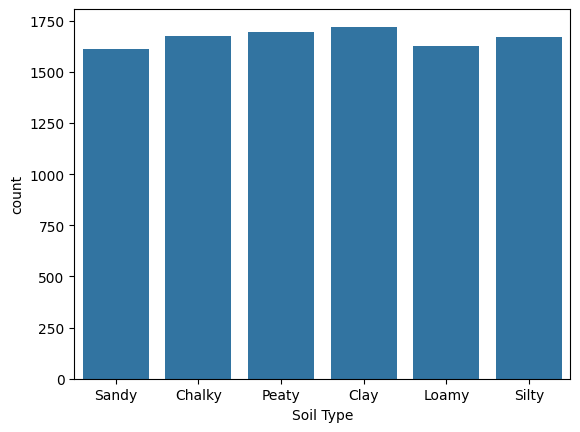

In [11]:
sns.countplot(x='Soil Type', data = df)

<Axes: xlabel='Crop', ylabel='count'>

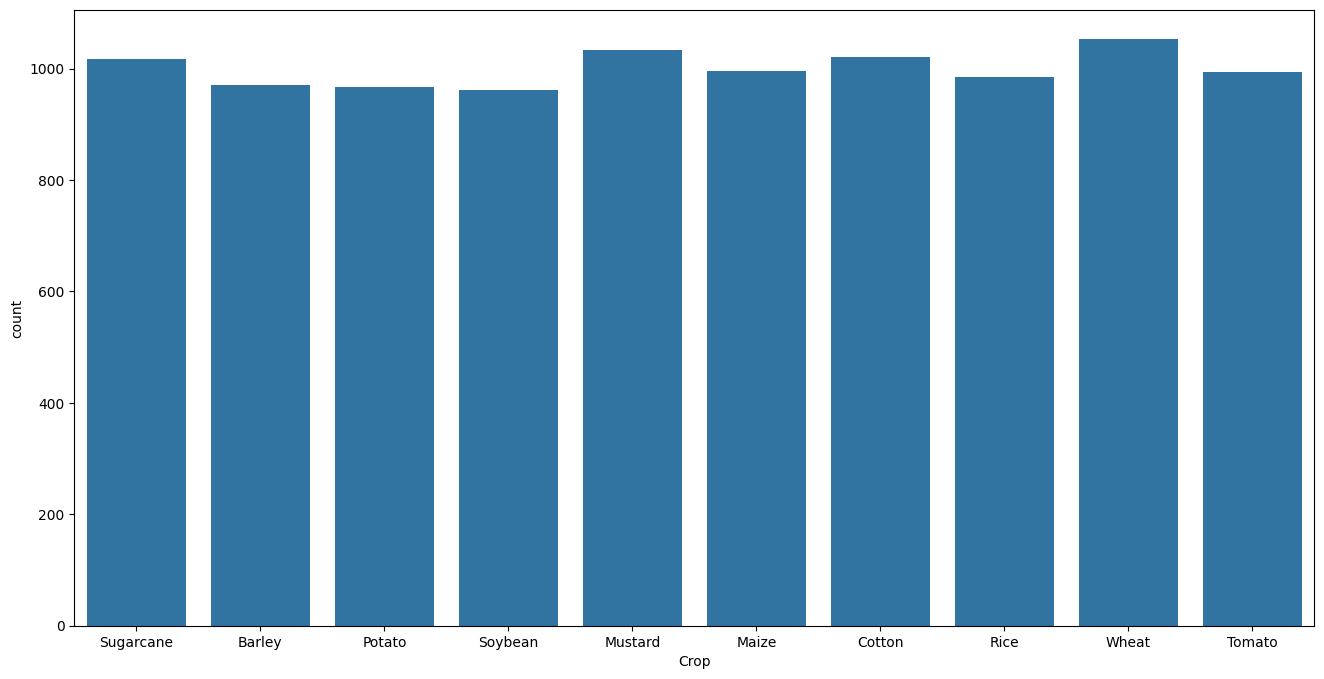

In [13]:
plt.figure(figsize=(16,8))
sns.countplot(x='Crop', data = df)

<Axes: xlabel='Fertilizer Recommendation', ylabel='count'>

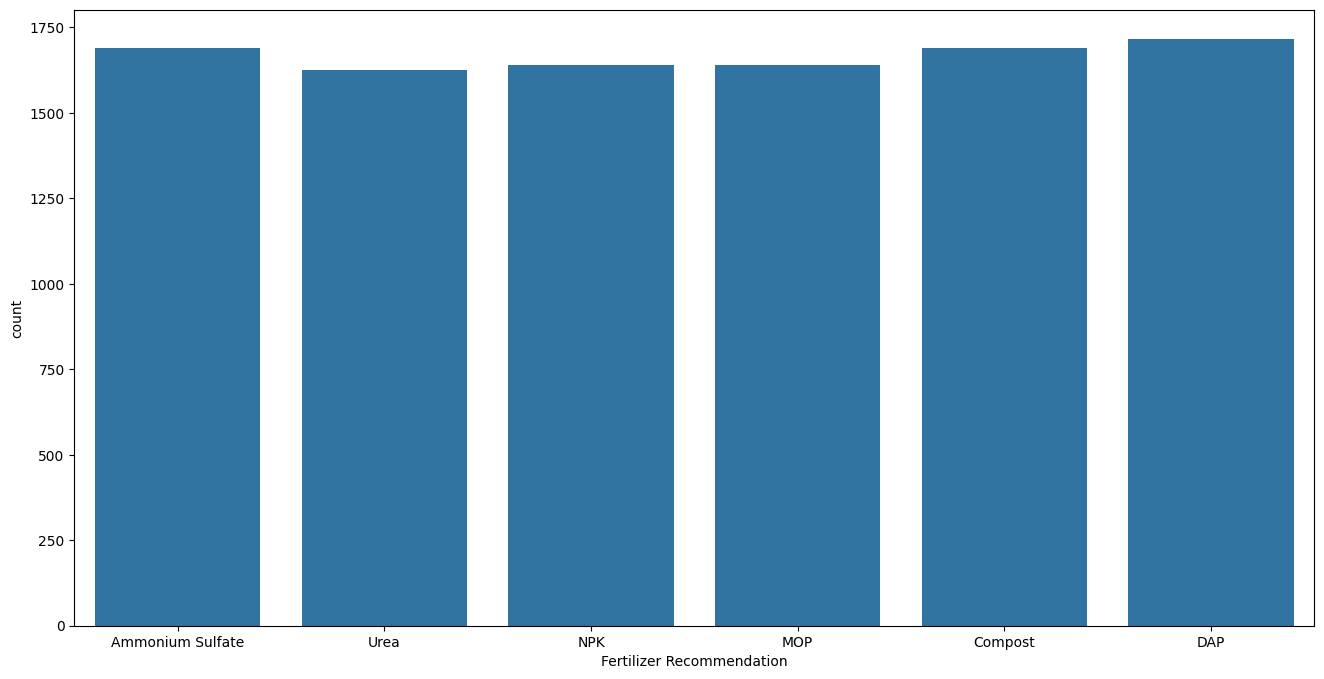

In [15]:
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer Recommendation', data = df)

In [16]:
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = df['Fertilizer Recommendation'])

def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer Recommendation'], ax=axes[1])

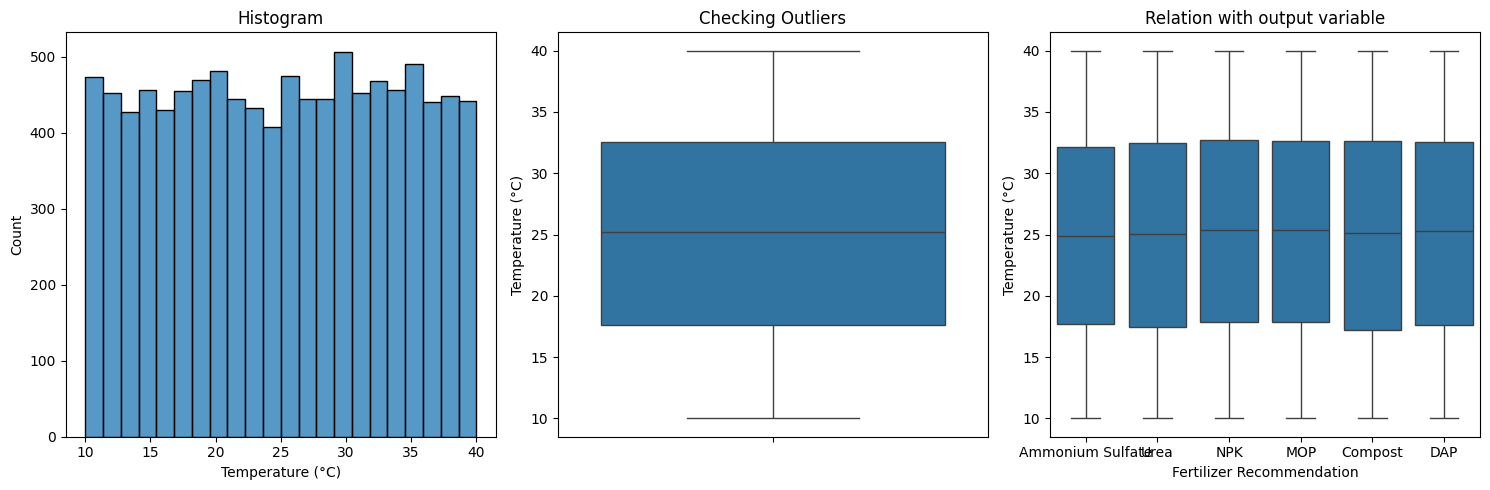

In [18]:
plot_conti(df['Temperature (°C)'])


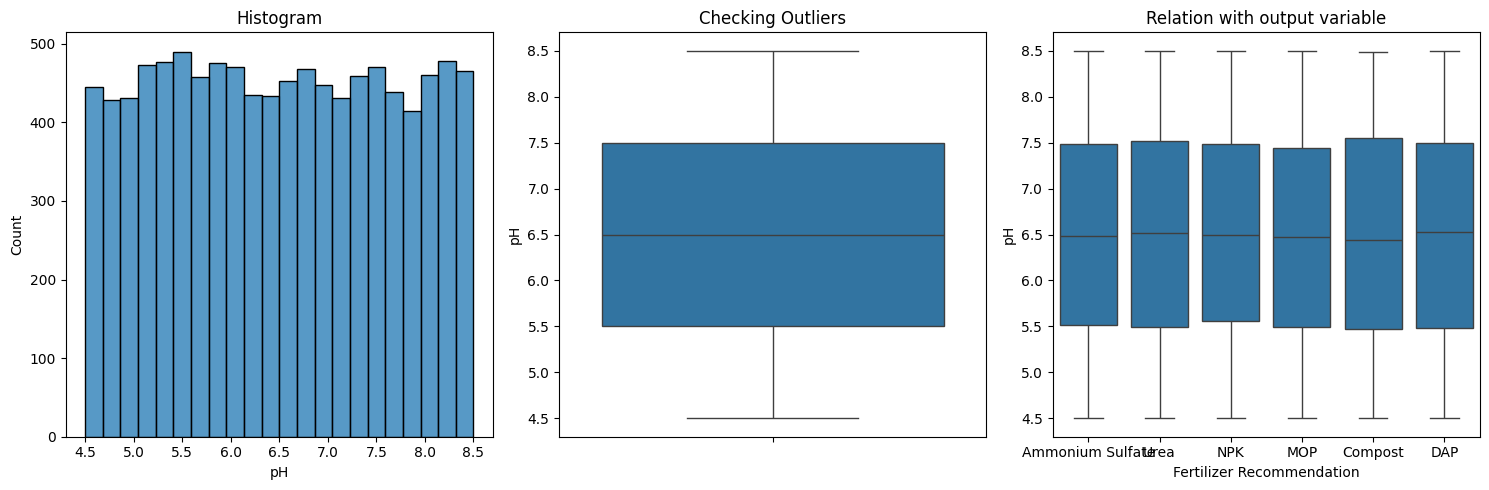

In [19]:
plot_conti(df['pH'])


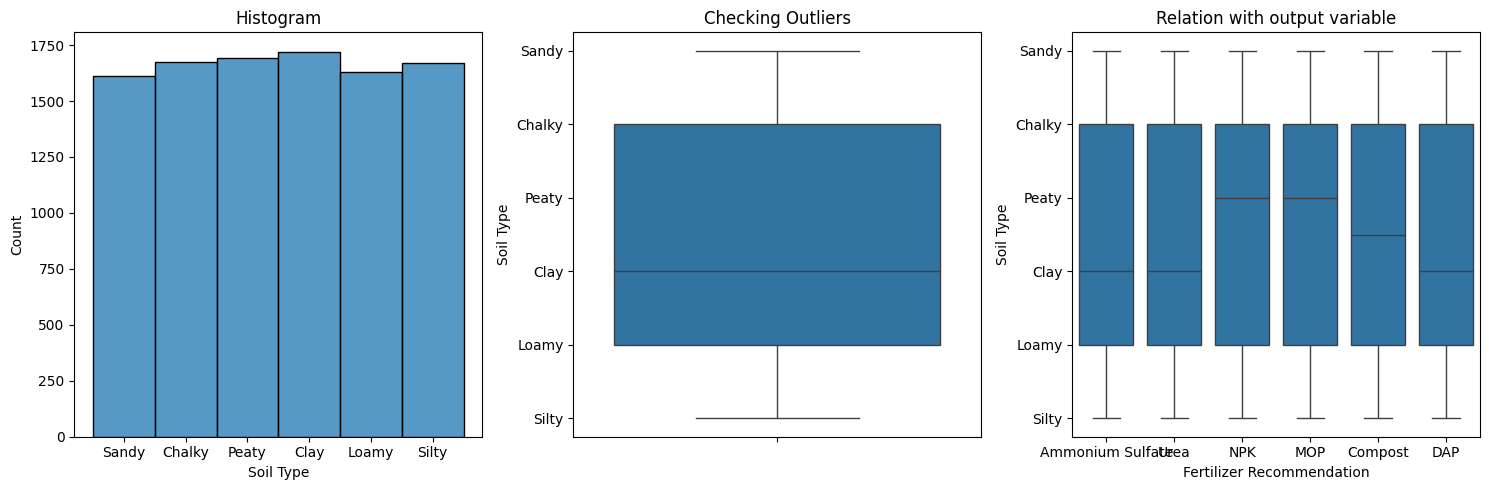

In [20]:
plot_conti(df['Soil Type'])


<Axes: xlabel='Soil Type', ylabel='Temperature (°C)'>

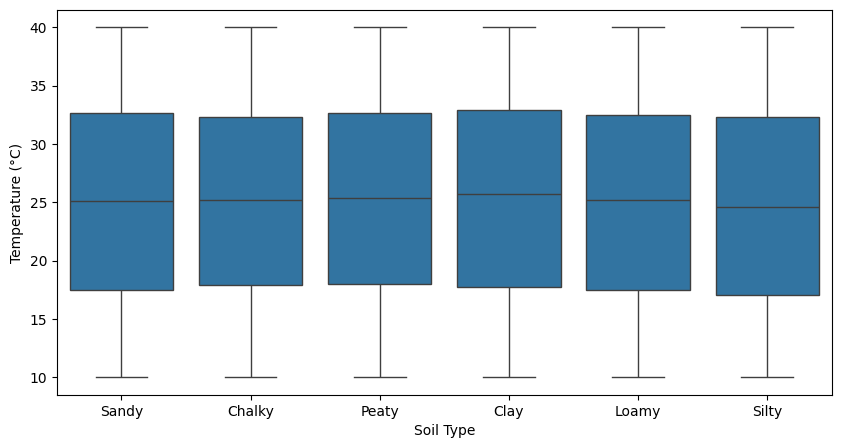

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Soil Type'],y=df['Temperature (°C)'])

<Axes: xlabel='Soil Type', ylabel='Temperature (°C)'>

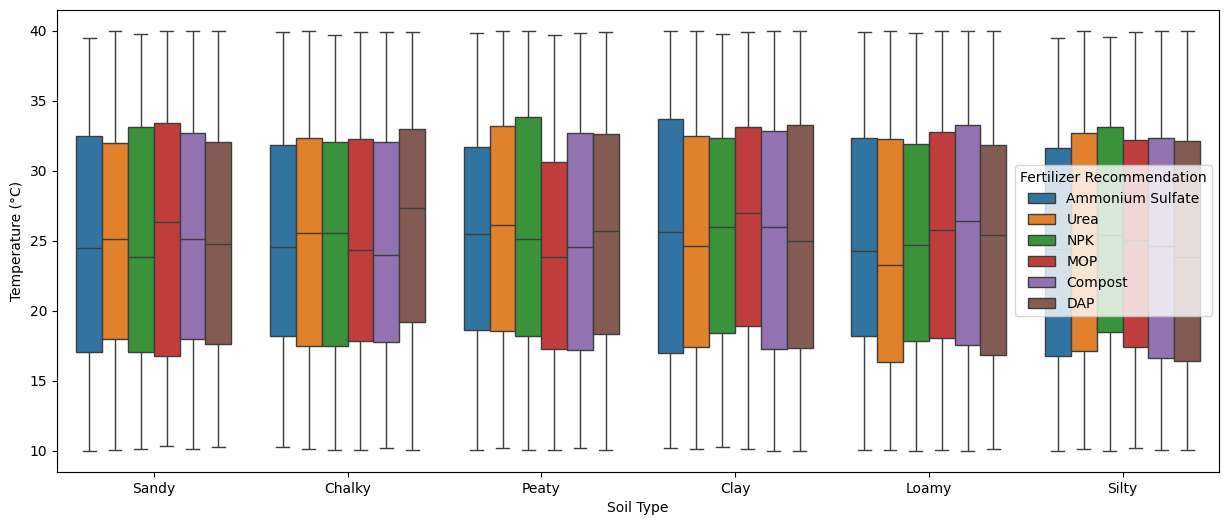

In [22]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Soil Type'],y=df['Temperature (°C)'],hue=df['Fertilizer Recommendation'])

<Axes: xlabel='Crop', ylabel='Temperature (°C)'>

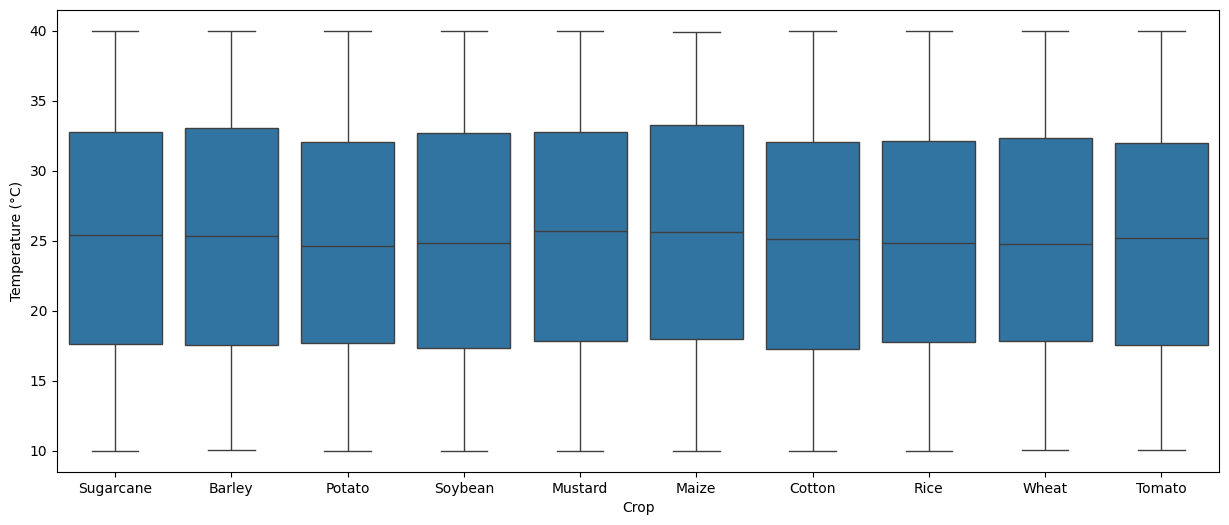

In [23]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Crop'],y=df['Temperature (°C)'])

<Axes: xlabel='Crop', ylabel='pH'>

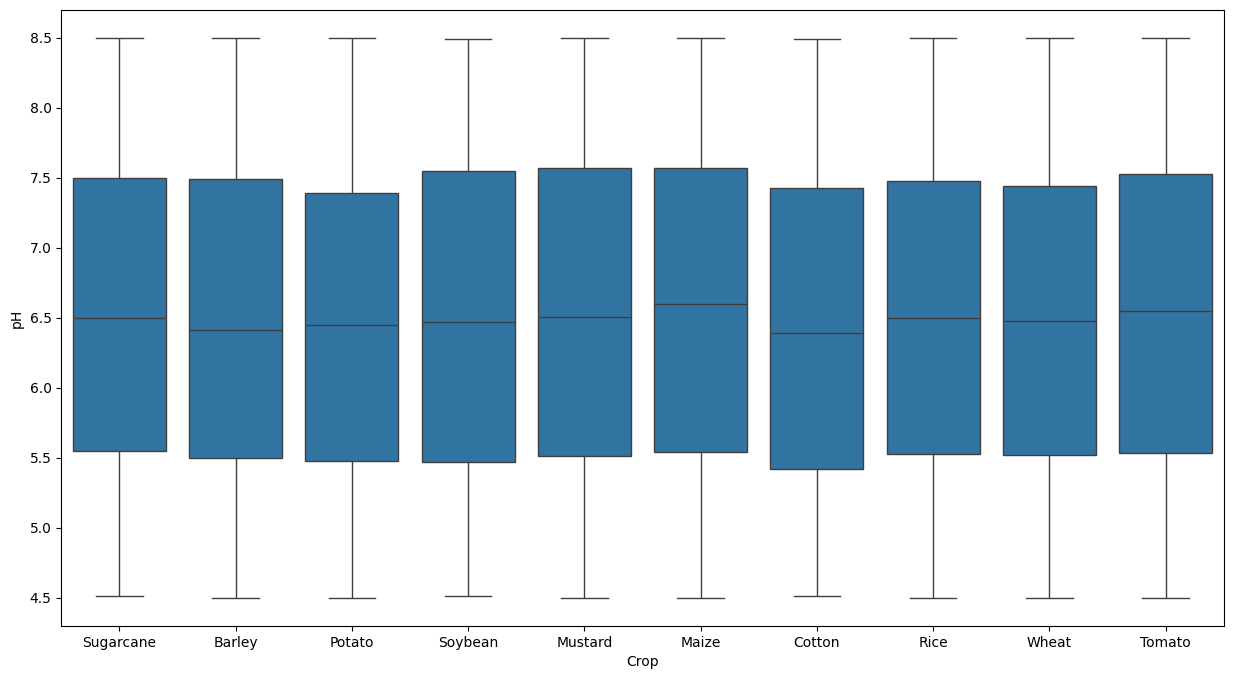

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop'],y=df['pH'])

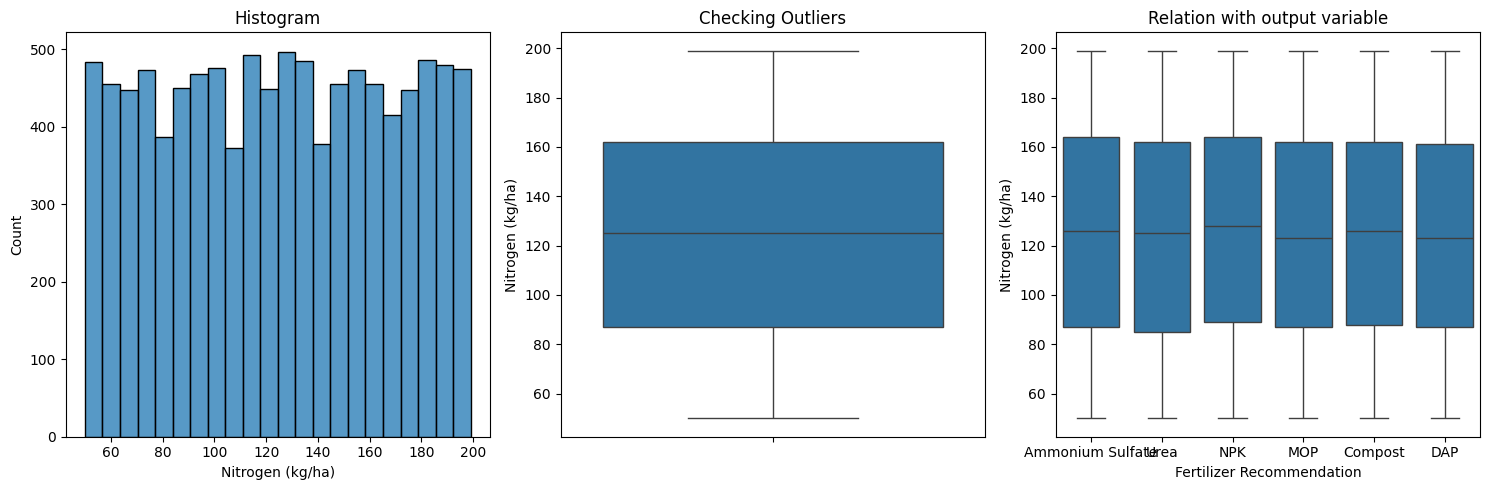

In [26]:
plot_conti(df['Nitrogen (kg/ha)'])


<Axes: xlabel='Crop', ylabel='Nitrogen (kg/ha)'>

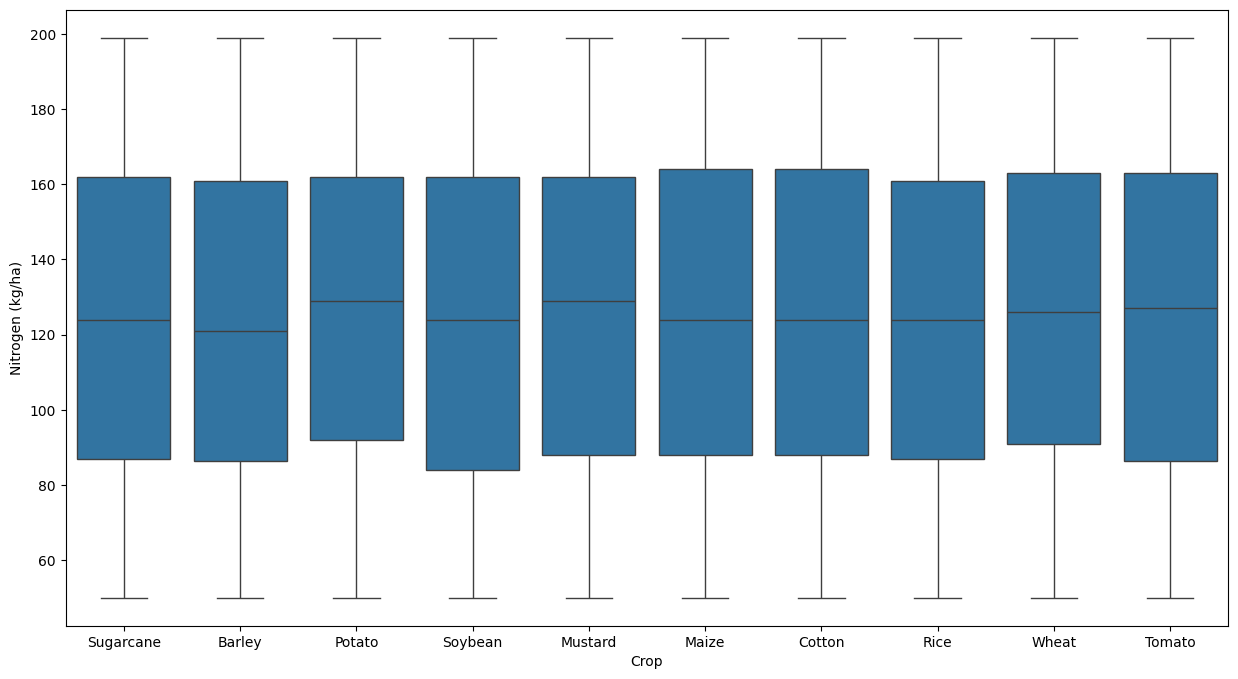

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop'],y=df['Nitrogen (kg/ha)'])

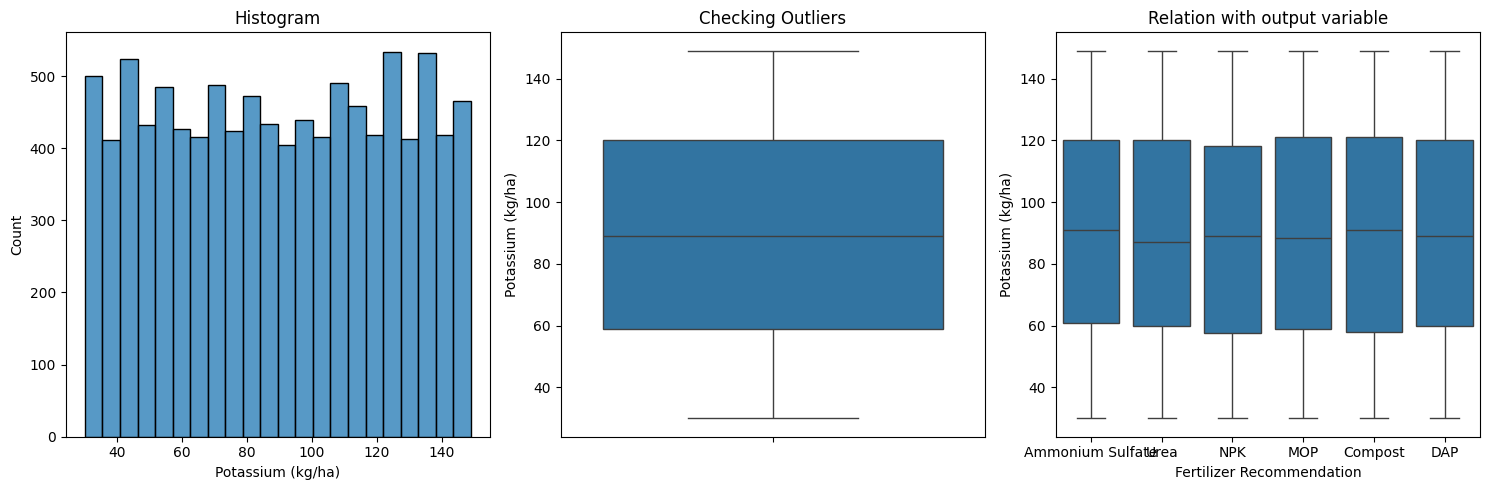

In [28]:
plot_conti(df['Potassium (kg/ha)'])


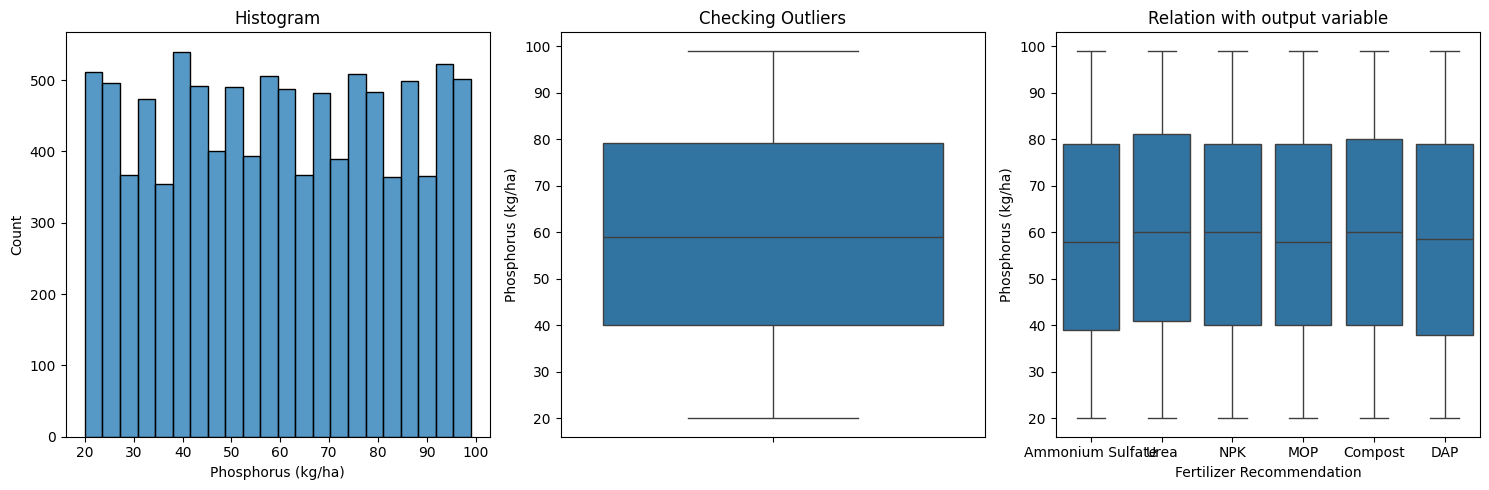

In [30]:
plot_conti(df['Phosphorus (kg/ha)'])


In [31]:
y = df['Fertilizer Recommendation'].copy()
X = df.drop('Fertilizer Recommendation', axis=1).copy()

In [32]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [33]:
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [0, 1, 3, 4]) # Explicitly specify all categorical features
], remainder='passthrough') # Passthrough numerical features
X = np.array(ct.fit_transform(X))

In [34]:
X[0]

array([0.0, 0.0, 0.0, ..., 188, 81, 42], dtype=object)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Assuming df is your DataFrame and y is your target variable
X = df.drop('Fertilizer Recommendation', axis=1)

# Define categorical and numerical features
categorical_features = ['Soil Type', 'Crop']  # Update with your categorical feature names
numerical_features = X.select_dtypes(include=['number']).columns.tolist() #get the names of numerical columns

# Create preprocessing pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

# Now you can split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, train_size=0.8, shuffle=True, random_state=42)

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
X_train[0]


array([ 9.87453174e-01, -1.11302919e+00,  6.35219385e-04,  1.36399682e+00,
       -7.39270743e-01, -4.51566957e-01, -4.56773236e-01, -4.42105488e-01,
       -4.53170905e-01, -4.36029801e-01,  2.25469514e+00, -3.24465254e-01,
       -3.38402982e-01,  3.01256813e+00, -3.39319906e-01, -3.27281534e-01,
       -3.27983278e-01, -3.27281534e-01, -3.38632350e-01, -3.33101804e-01,
       -3.44564441e-01])

In [40]:
def evaluate_and_save_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} classification report")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    #sn.heatmap(cm, annot=True, fmt='d')
    sns.heatmap(cm, annot=True, cmap='Blues')
    #sns.heatmap(cm, annot = True, cmap = 'Wistia')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    # Save the model
    model_path = os.path.join('all_models', f'{model_name}_model.pkl')
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)

    return acc

In [42]:
!pip install --upgrade scikit-learn

ExtraTreesClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.16      0.18      0.17       341
         Compost       0.18      0.19      0.19       355
             DAP       0.18      0.18      0.18       343
             MOP       0.12      0.11      0.12       306
             NPK       0.18      0.17      0.18       336
            Urea       0.14      0.13      0.14       319

        accuracy                           0.16      2000
       macro avg       0.16      0.16      0.16      2000
    weighted avg       0.16      0.16      0.16      2000



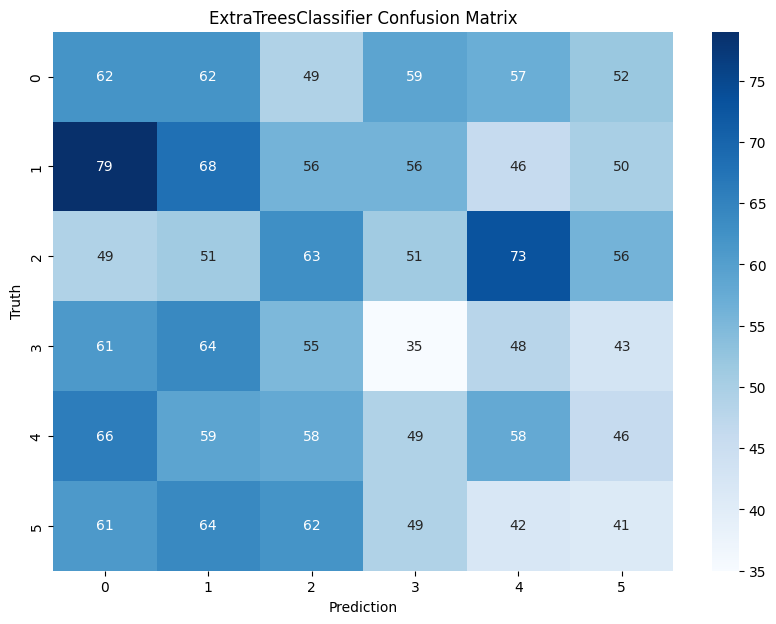

LinearDiscriminantAnalysis classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.17      0.21      0.19       341
         Compost       0.17      0.14      0.15       355
             DAP       0.18      0.24      0.21       343
             MOP       0.14      0.07      0.10       306
             NPK       0.17      0.20      0.18       336
            Urea       0.20      0.19      0.20       319

        accuracy                           0.17      2000
       macro avg       0.17      0.17      0.17      2000
    weighted avg       0.17      0.17      0.17      2000



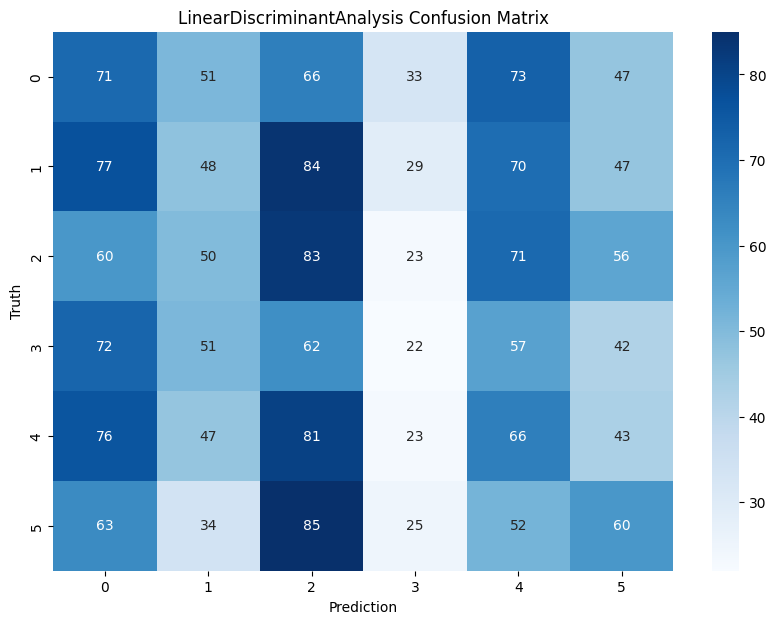

QuadraticDiscriminantAnalysis classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.18      0.25      0.21       341
         Compost       0.12      0.04      0.06       355
             DAP       0.21      0.21      0.21       343
             MOP       0.14      0.20      0.16       306
             NPK       0.16      0.22      0.19       336
            Urea       0.17      0.08      0.11       319

        accuracy                           0.17      2000
       macro avg       0.16      0.17      0.16      2000
    weighted avg       0.16      0.17      0.16      2000



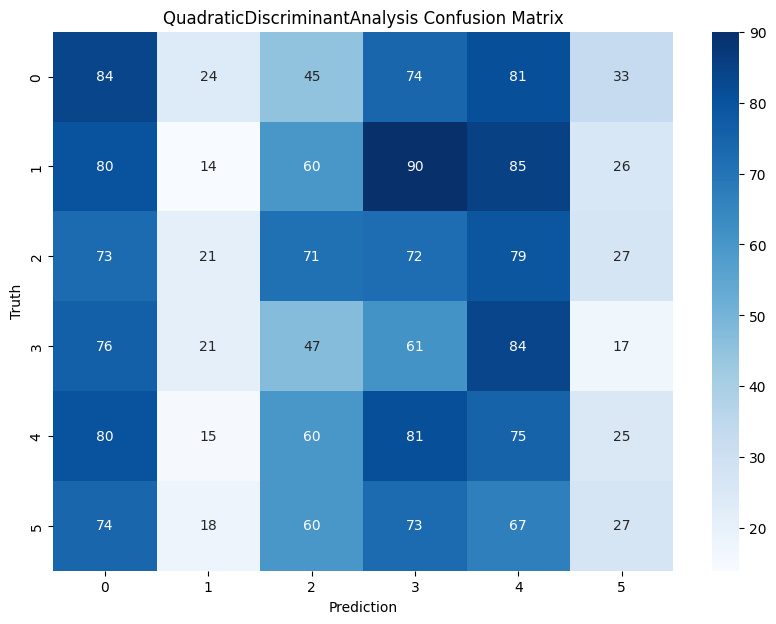

RidgeClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.17      0.21      0.19       341
         Compost       0.17      0.14      0.15       355
             DAP       0.18      0.24      0.21       343
             MOP       0.14      0.07      0.09       306
             NPK       0.17      0.19      0.18       336
            Urea       0.20      0.18      0.19       319

        accuracy                           0.17      2000
       macro avg       0.17      0.17      0.17      2000
    weighted avg       0.17      0.17      0.17      2000



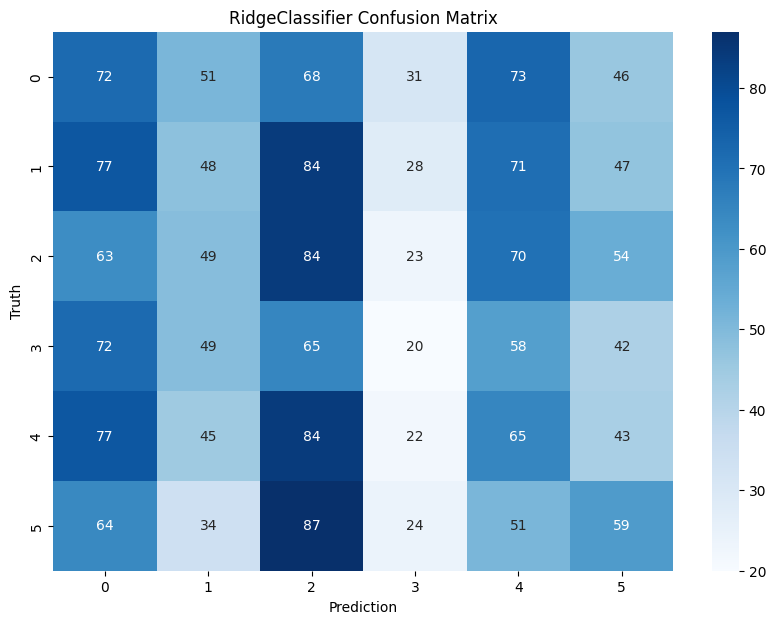

PassiveAggressiveClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.18      0.22      0.20       341
         Compost       0.17      0.20      0.18       355
             DAP       0.17      0.16      0.17       343
             MOP       0.14      0.14      0.14       306
             NPK       0.19      0.10      0.13       336
            Urea       0.15      0.16      0.15       319

        accuracy                           0.17      2000
       macro avg       0.17      0.16      0.16      2000
    weighted avg       0.17      0.17      0.16      2000



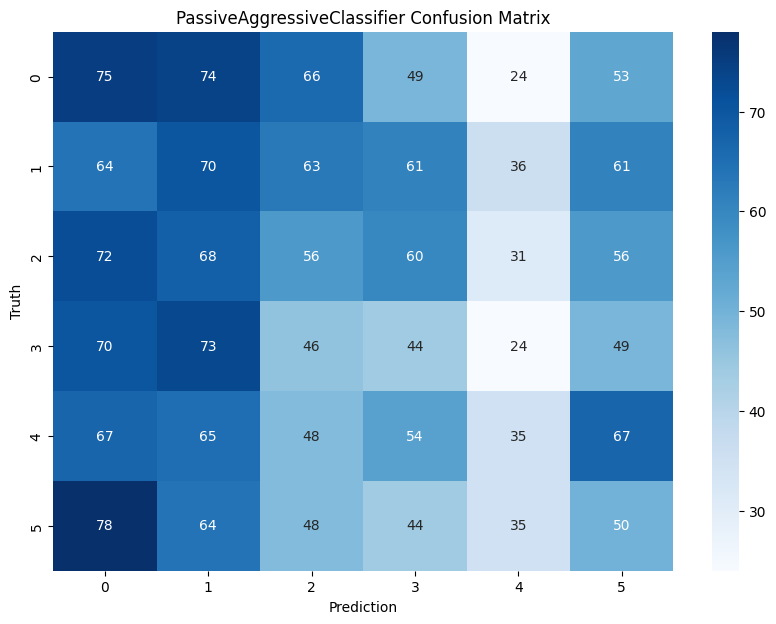

Perceptron classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.16      0.19      0.17       341
         Compost       0.15      0.17      0.16       355
             DAP       0.17      0.10      0.13       343
             MOP       0.14      0.05      0.08       306
             NPK       0.16      0.21      0.18       336
            Urea       0.14      0.19      0.17       319

        accuracy                           0.15      2000
       macro avg       0.15      0.15      0.15      2000
    weighted avg       0.15      0.15      0.15      2000



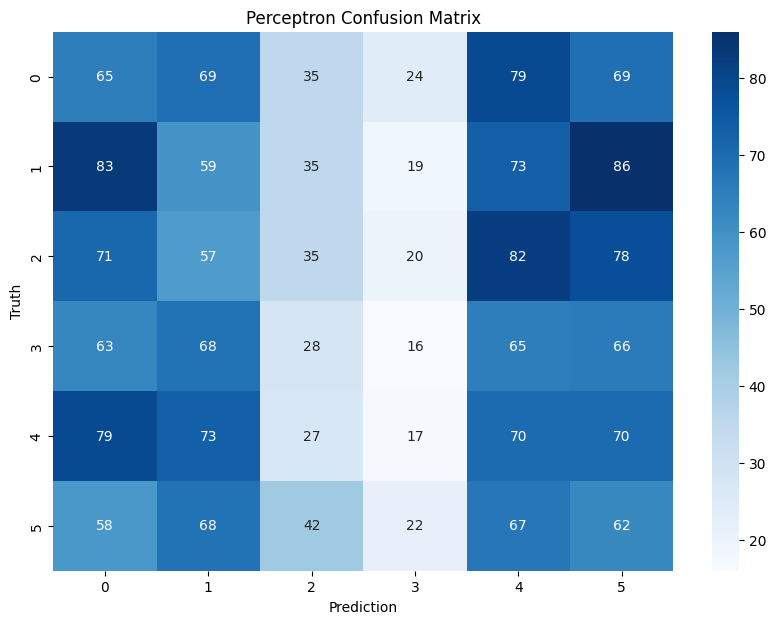

BaggingClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.17      0.26      0.21       341
         Compost       0.16      0.19      0.18       355
             DAP       0.16      0.15      0.15       343
             MOP       0.12      0.12      0.12       306
             NPK       0.12      0.09      0.10       336
            Urea       0.13      0.08      0.10       319

        accuracy                           0.15      2000
       macro avg       0.14      0.15      0.14      2000
    weighted avg       0.14      0.15      0.14      2000



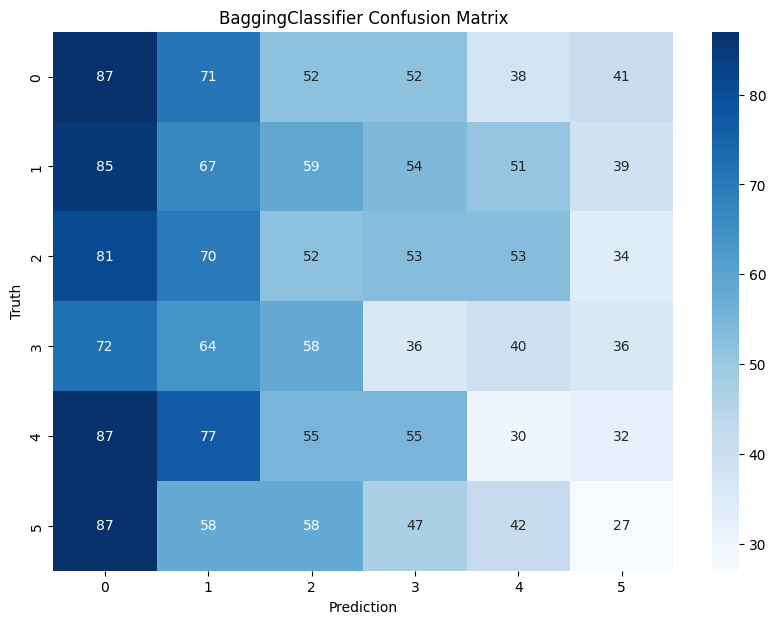

HistGradientBoostingClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.20      0.21      0.20       341
         Compost       0.18      0.16      0.17       355
             DAP       0.14      0.14      0.14       343
             MOP       0.14      0.16      0.15       306
             NPK       0.18      0.18      0.18       336
            Urea       0.17      0.16      0.17       319

        accuracy                           0.17      2000
       macro avg       0.17      0.17      0.17      2000
    weighted avg       0.17      0.17      0.17      2000



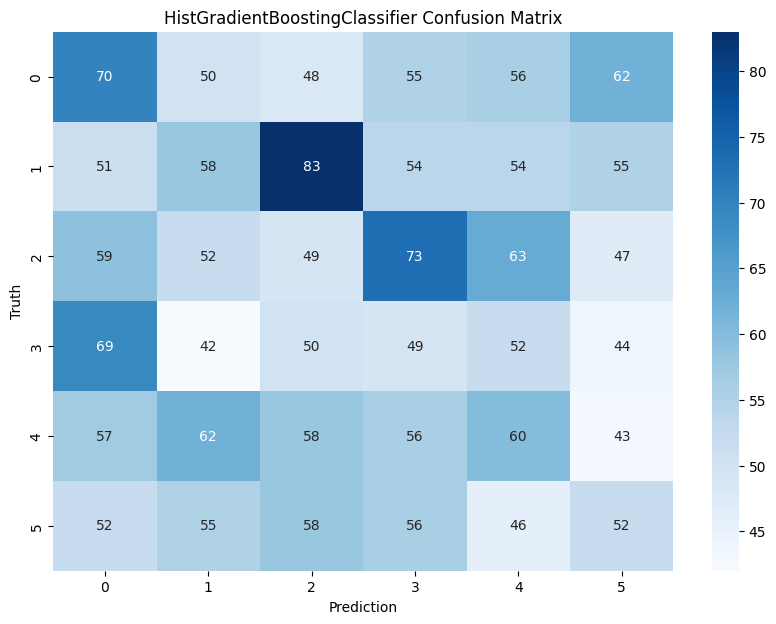

SGDClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.17      0.17      0.17       341
         Compost       0.16      0.16      0.16       355
             DAP       0.15      0.11      0.13       343
             MOP       0.14      0.19      0.16       306
             NPK       0.17      0.23      0.19       336
            Urea       0.18      0.12      0.14       319

        accuracy                           0.16      2000
       macro avg       0.16      0.16      0.16      2000
    weighted avg       0.16      0.16      0.16      2000



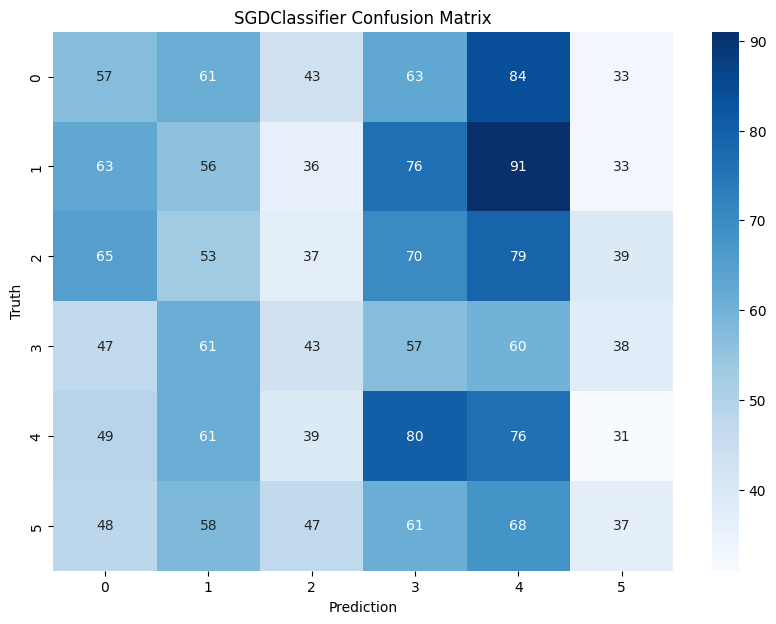

NearestCentroid classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.16      0.17      0.17       341
         Compost       0.16      0.13      0.14       355
             DAP       0.18      0.17      0.17       343
             MOP       0.15      0.08      0.10       306
             NPK       0.18      0.25      0.21       336
            Urea       0.19      0.24      0.21       319

        accuracy                           0.17      2000
       macro avg       0.17      0.17      0.17      2000
    weighted avg       0.17      0.17      0.17      2000



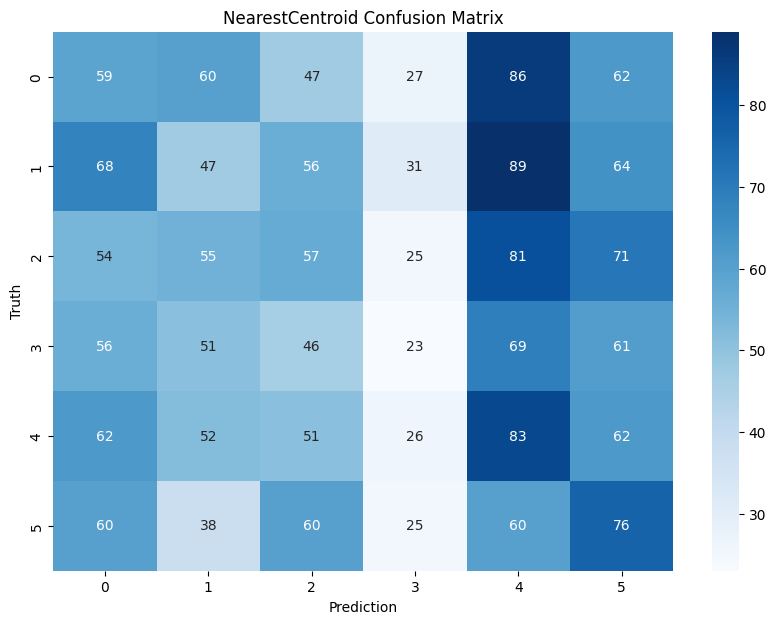

K-NeighborsClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.19      0.31      0.24       341
         Compost       0.19      0.21      0.20       355
             DAP       0.17      0.17      0.17       343
             MOP       0.16      0.15      0.15       306
             NPK       0.13      0.10      0.11       336
            Urea       0.14      0.08      0.10       319

        accuracy                           0.17      2000
       macro avg       0.16      0.17      0.16      2000
    weighted avg       0.17      0.17      0.16      2000



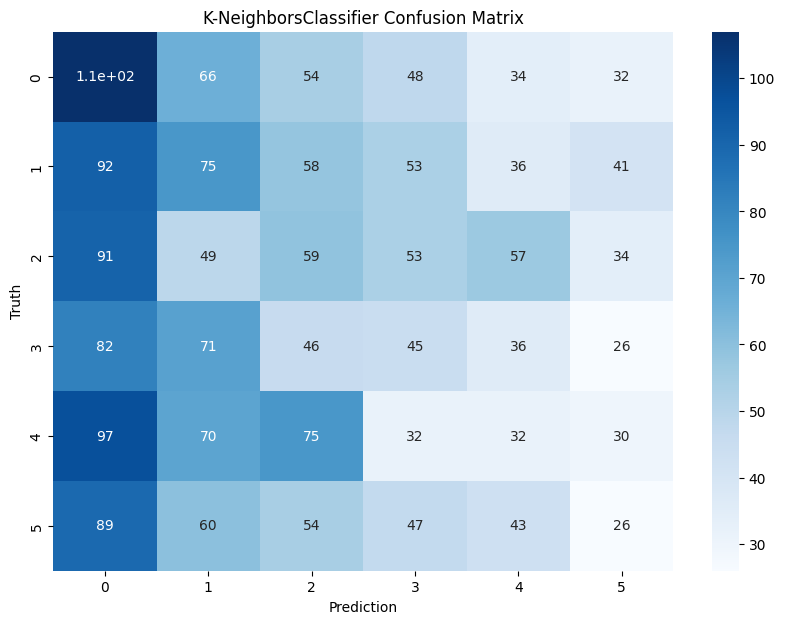

GradientBoostingClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.18      0.19      0.19       341
         Compost       0.17      0.15      0.16       355
             DAP       0.14      0.17      0.16       343
             MOP       0.14      0.14      0.14       306
             NPK       0.16      0.15      0.16       336
            Urea       0.15      0.13      0.14       319

        accuracy                           0.16      2000
       macro avg       0.16      0.16      0.16      2000
    weighted avg       0.16      0.16      0.16      2000



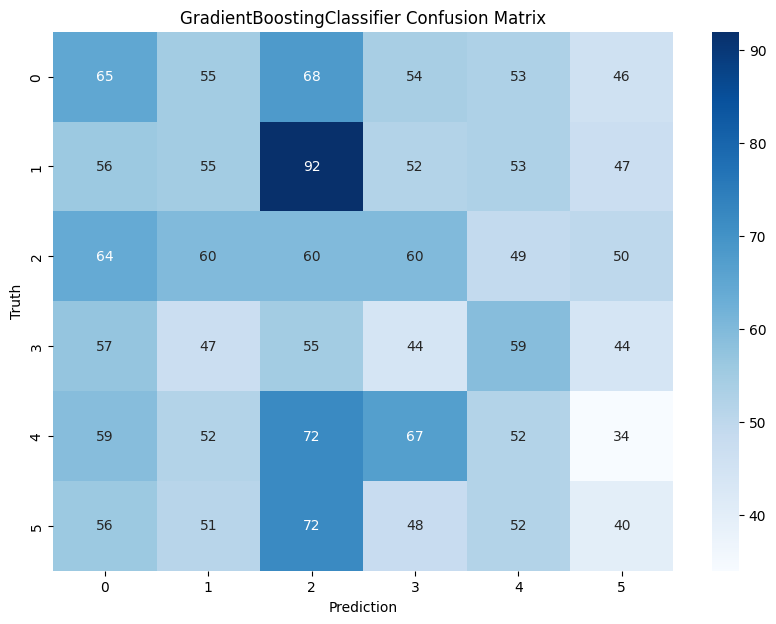

RandomForestClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.19      0.22      0.21       341
         Compost       0.20      0.20      0.20       355
             DAP       0.17      0.17      0.17       343
             MOP       0.13      0.13      0.13       306
             NPK       0.16      0.15      0.15       336
            Urea       0.12      0.10      0.11       319

        accuracy                           0.16      2000
       macro avg       0.16      0.16      0.16      2000
    weighted avg       0.16      0.16      0.16      2000



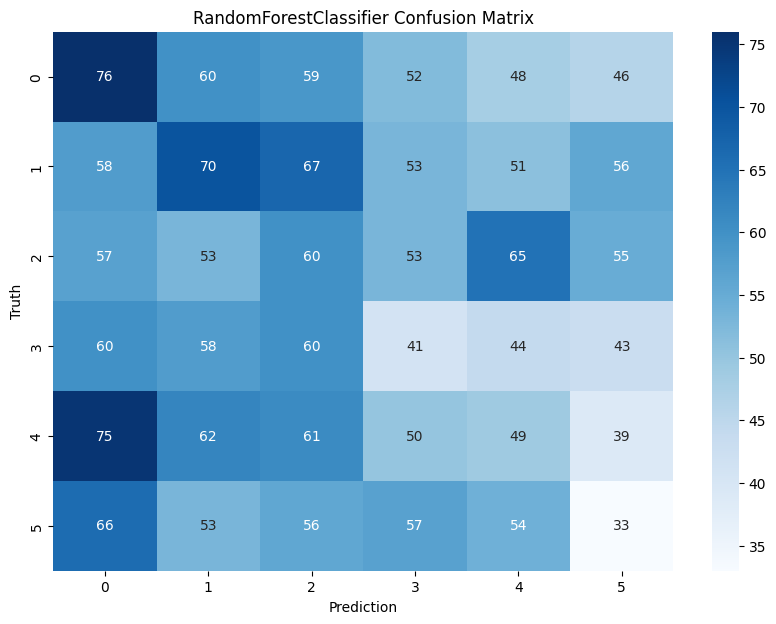

LogisticRegression classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.17      0.21      0.19       341
         Compost       0.17      0.14      0.15       355
             DAP       0.18      0.24      0.20       343
             MOP       0.14      0.07      0.09       306
             NPK       0.16      0.18      0.17       336
            Urea       0.20      0.19      0.20       319

        accuracy                           0.17      2000
       macro avg       0.17      0.17      0.17      2000
    weighted avg       0.17      0.17      0.17      2000



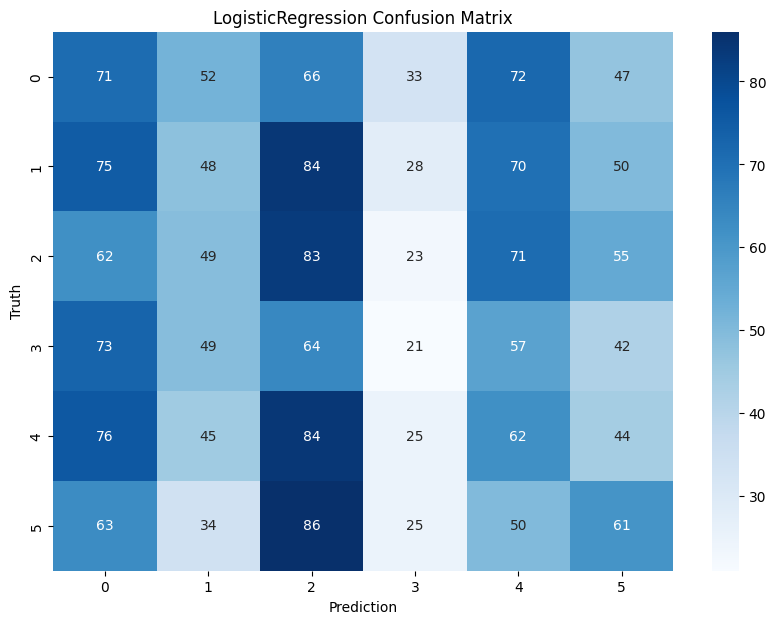

SupportVectorClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.18      0.22      0.20       341
         Compost       0.18      0.16      0.17       355
             DAP       0.16      0.20      0.18       343
             MOP       0.13      0.12      0.13       306
             NPK       0.17      0.16      0.16       336
            Urea       0.15      0.12      0.13       319

        accuracy                           0.16      2000
       macro avg       0.16      0.16      0.16      2000
    weighted avg       0.16      0.16      0.16      2000



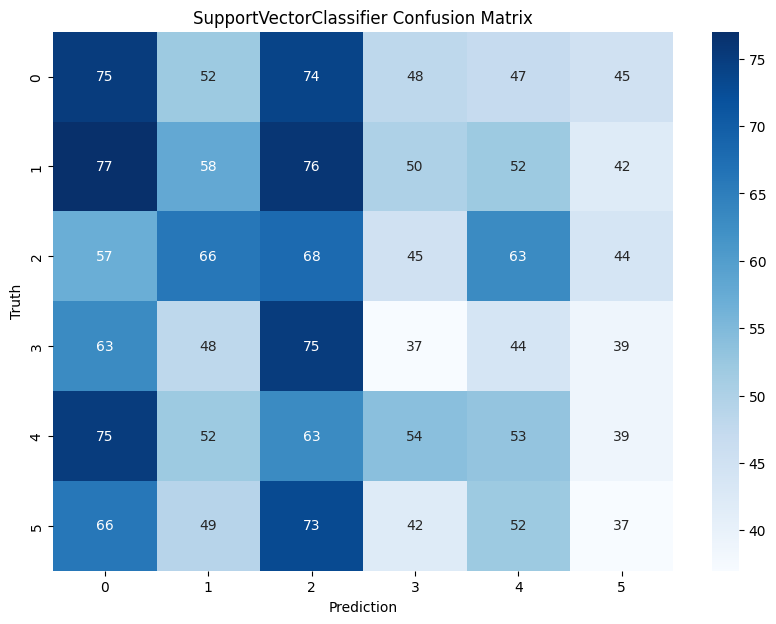

DecisionTreeClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.20      0.20      0.20       341
         Compost       0.18      0.18      0.18       355
             DAP       0.20      0.20      0.20       343
             MOP       0.14      0.17      0.15       306
             NPK       0.14      0.12      0.13       336
            Urea       0.16      0.15      0.15       319

        accuracy                           0.17      2000
       macro avg       0.17      0.17      0.17      2000
    weighted avg       0.17      0.17      0.17      2000



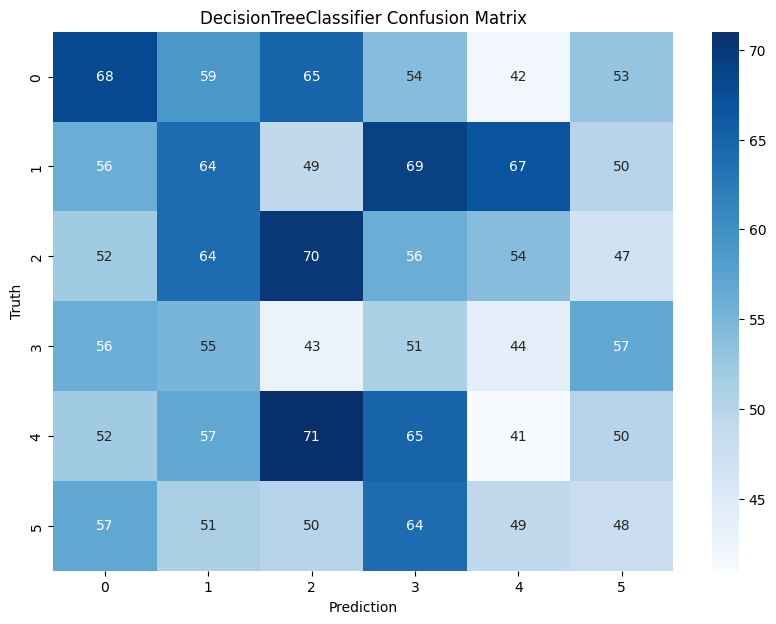

AdaBoostClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.00      0.00      0.00       341
         Compost       0.17      0.55      0.26       355
             DAP       0.15      0.33      0.21       343
             MOP       0.14      0.06      0.08       306
             NPK       0.07      0.00      0.01       336
            Urea       0.33      0.01      0.02       319

        accuracy                           0.16      2000
       macro avg       0.15      0.16      0.10      2000
    weighted avg       0.14      0.16      0.10      2000



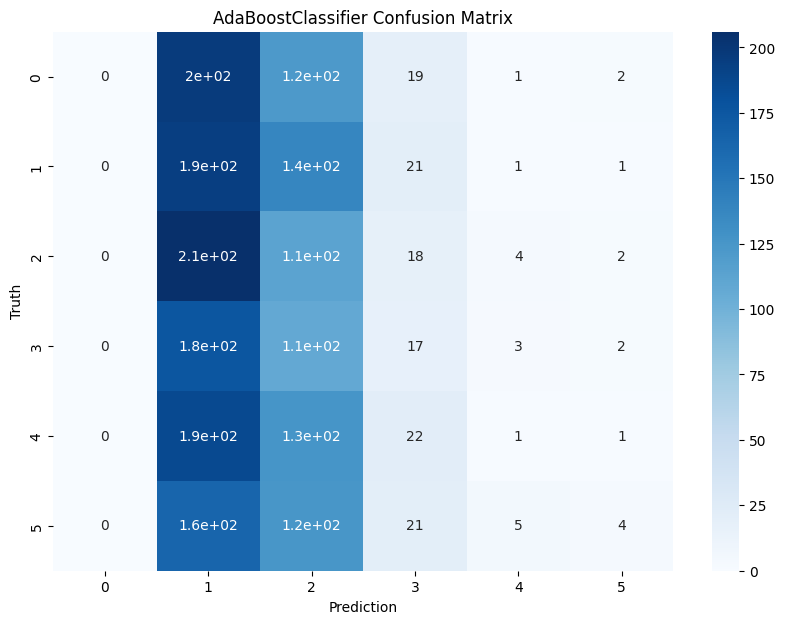

CatBoostClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.18      0.18      0.18       341
         Compost       0.17      0.16      0.16       355
             DAP       0.16      0.17      0.17       343
             MOP       0.14      0.16      0.15       306
             NPK       0.16      0.15      0.15       336
            Urea       0.15      0.14      0.15       319

        accuracy                           0.16      2000
       macro avg       0.16      0.16      0.16      2000
    weighted avg       0.16      0.16      0.16      2000



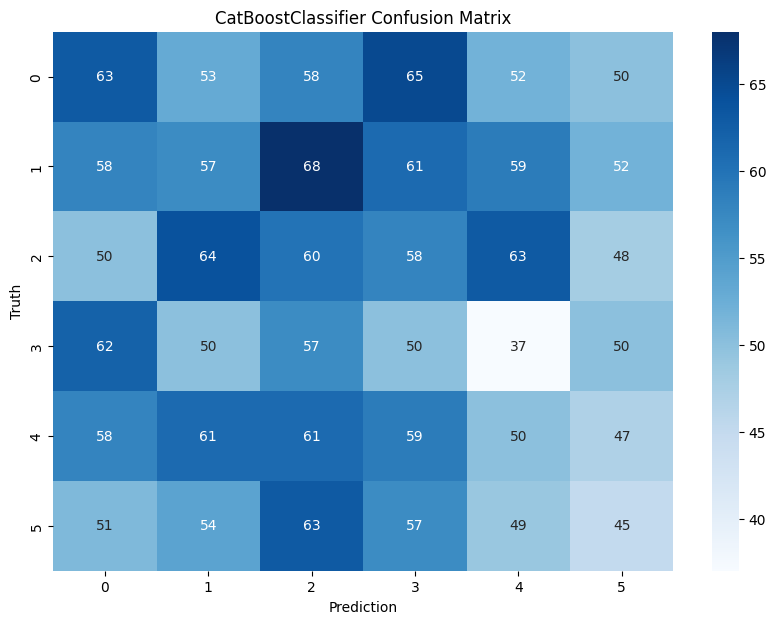

ExtraTreeClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.18      0.18      0.18       341
         Compost       0.17      0.16      0.16       355
             DAP       0.17      0.17      0.17       343
             MOP       0.14      0.13      0.14       306
             NPK       0.16      0.16      0.16       336
            Urea       0.17      0.17      0.17       319

        accuracy                           0.16      2000
       macro avg       0.16      0.16      0.16      2000
    weighted avg       0.16      0.16      0.16      2000



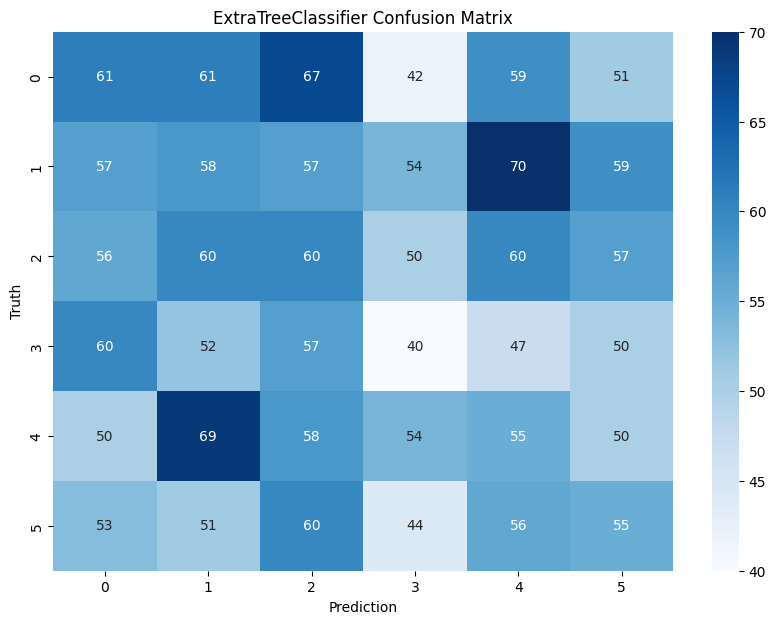

LabelPropagation classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.20      0.19      0.20       341
         Compost       0.19      0.21      0.20       355
             DAP       0.18      0.17      0.17       343
             MOP       0.14      0.15      0.14       306
             NPK       0.16      0.16      0.16       336
            Urea       0.14      0.13      0.13       319

        accuracy                           0.17      2000
       macro avg       0.17      0.17      0.17      2000
    weighted avg       0.17      0.17      0.17      2000



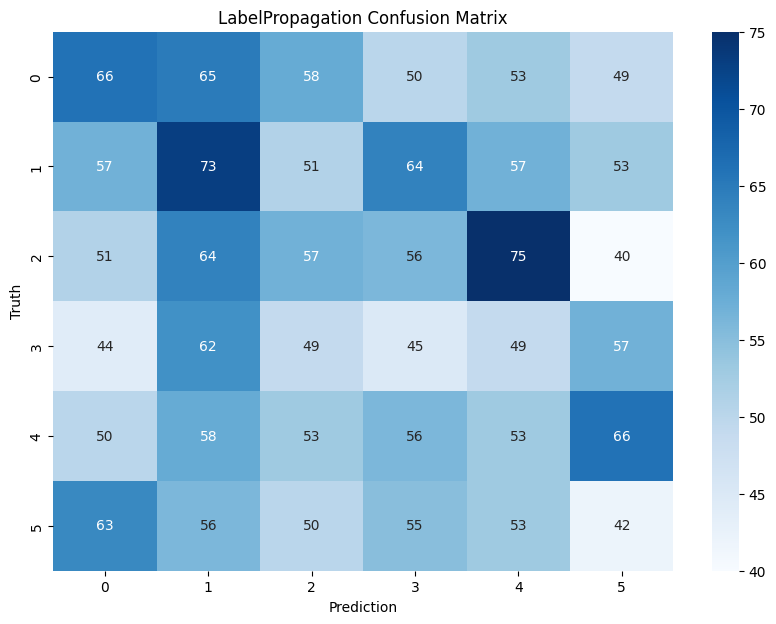

LabelSpreading classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.20      0.19      0.20       341
         Compost       0.19      0.21      0.20       355
             DAP       0.18      0.17      0.17       343
             MOP       0.14      0.15      0.15       306
             NPK       0.16      0.16      0.16       336
            Urea       0.13      0.13      0.13       319

        accuracy                           0.17      2000
       macro avg       0.17      0.17      0.17      2000
    weighted avg       0.17      0.17      0.17      2000



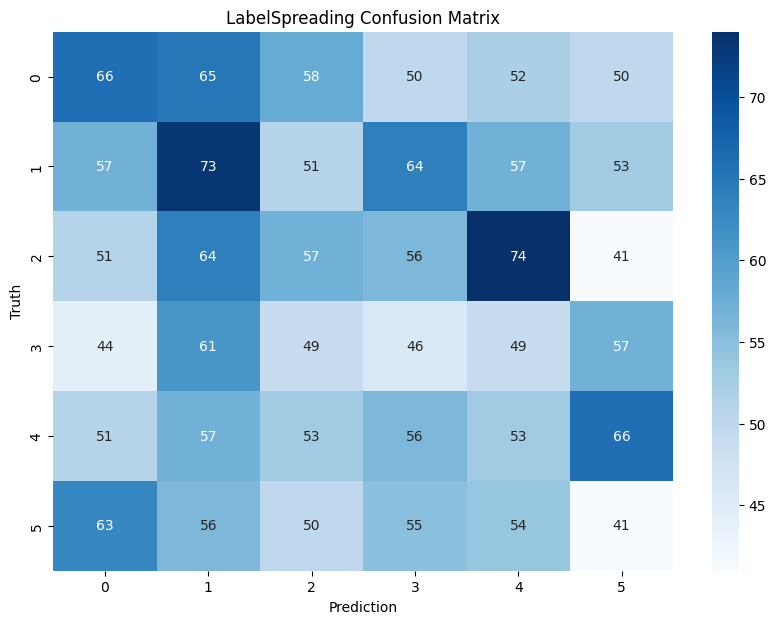

GaussianProcessClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.19      0.20      0.19       341
         Compost       0.20      0.20      0.20       355
             DAP       0.17      0.18      0.18       343
             MOP       0.13      0.13      0.13       306
             NPK       0.15      0.14      0.14       336
            Urea       0.14      0.13      0.13       319

        accuracy                           0.16      2000
       macro avg       0.16      0.16      0.16      2000
    weighted avg       0.16      0.16      0.16      2000



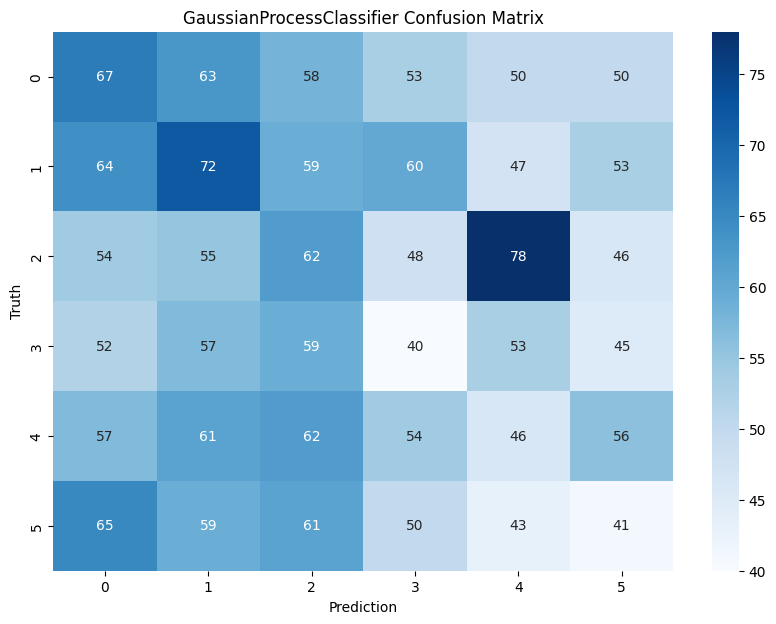

GaussianNB classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.17      0.23      0.19       341
         Compost       0.17      0.17      0.17       355
             DAP       0.18      0.15      0.16       343
             MOP       0.14      0.04      0.06       306
             NPK       0.19      0.29      0.23       336
            Urea       0.18      0.16      0.17       319

        accuracy                           0.18      2000
       macro avg       0.17      0.17      0.16      2000
    weighted avg       0.17      0.18      0.17      2000



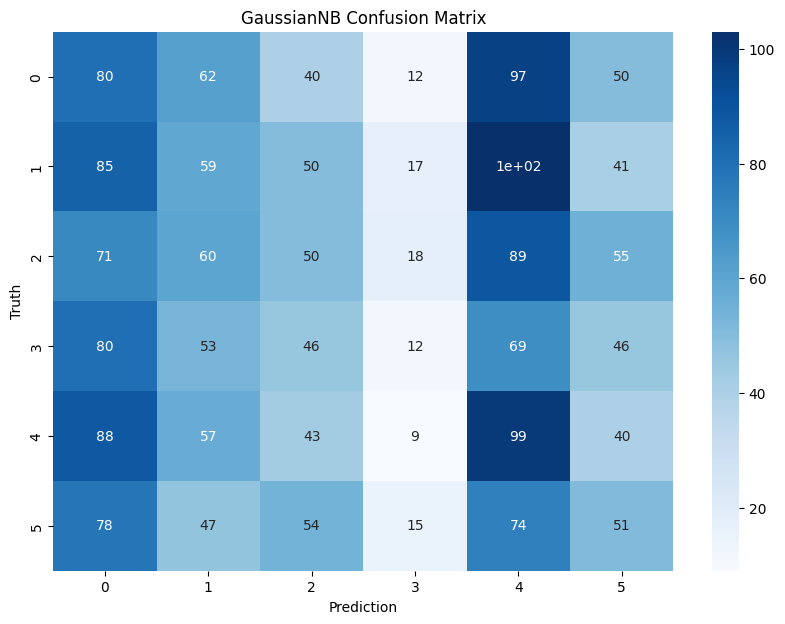

VotingClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.18      0.34      0.24       341
         Compost       0.19      0.19      0.19       355
             DAP       0.18      0.20      0.19       343
             MOP       0.15      0.09      0.11       306
             NPK       0.16      0.12      0.14       336
            Urea       0.13      0.07      0.09       319

        accuracy                           0.17      2000
       macro avg       0.17      0.17      0.16      2000
    weighted avg       0.17      0.17      0.16      2000



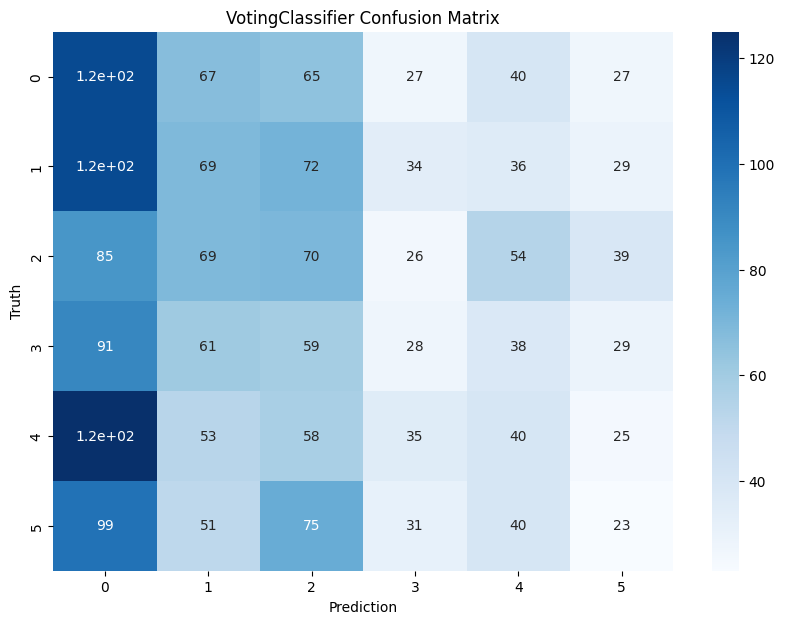

StackingClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.18      0.27      0.21       341
         Compost       0.17      0.20      0.19       355
             DAP       0.15      0.28      0.20       343
             MOP       0.14      0.09      0.11       306
             NPK       0.18      0.08      0.11       336
            Urea       0.15      0.04      0.07       319

        accuracy                           0.16      2000
       macro avg       0.16      0.16      0.15      2000
    weighted avg       0.16      0.16      0.15      2000



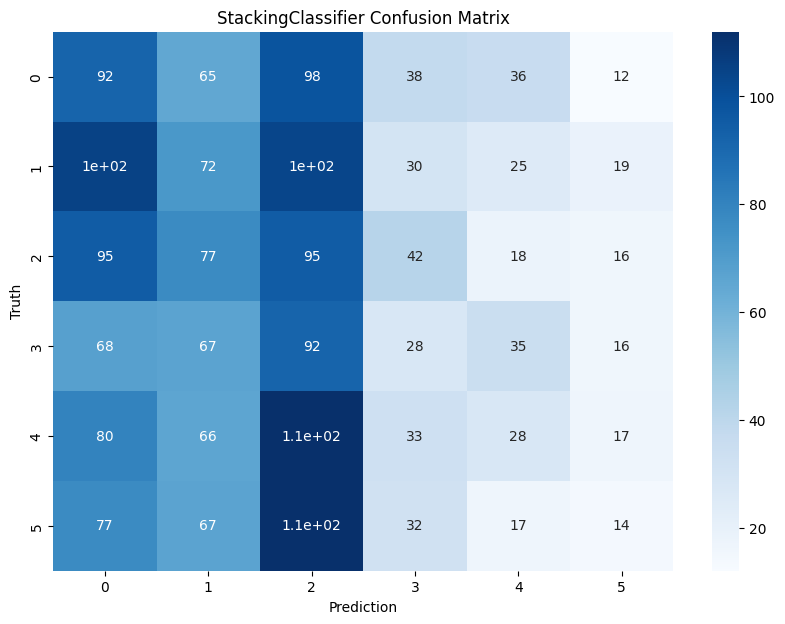

BaggingClassifier_SVC classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.17      0.25      0.20       341
         Compost       0.15      0.15      0.15       355
             DAP       0.14      0.15      0.15       343
             MOP       0.12      0.12      0.12       306
             NPK       0.14      0.10      0.12       336
            Urea       0.12      0.08      0.09       319

        accuracy                           0.14      2000
       macro avg       0.14      0.14      0.14      2000
    weighted avg       0.14      0.14      0.14      2000



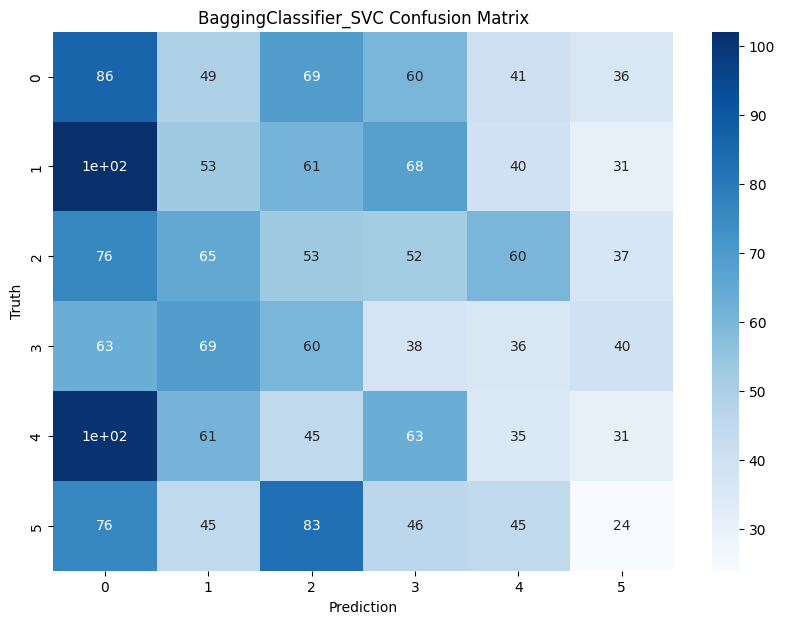

MLPClassifier classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.17      0.18      0.17       341
         Compost       0.15      0.16      0.16       355
             DAP       0.15      0.13      0.14       343
             MOP       0.15      0.16      0.15       306
             NPK       0.17      0.18      0.18       336
            Urea       0.13      0.13      0.13       319

        accuracy                           0.16      2000
       macro avg       0.16      0.16      0.16      2000
    weighted avg       0.16      0.16      0.16      2000



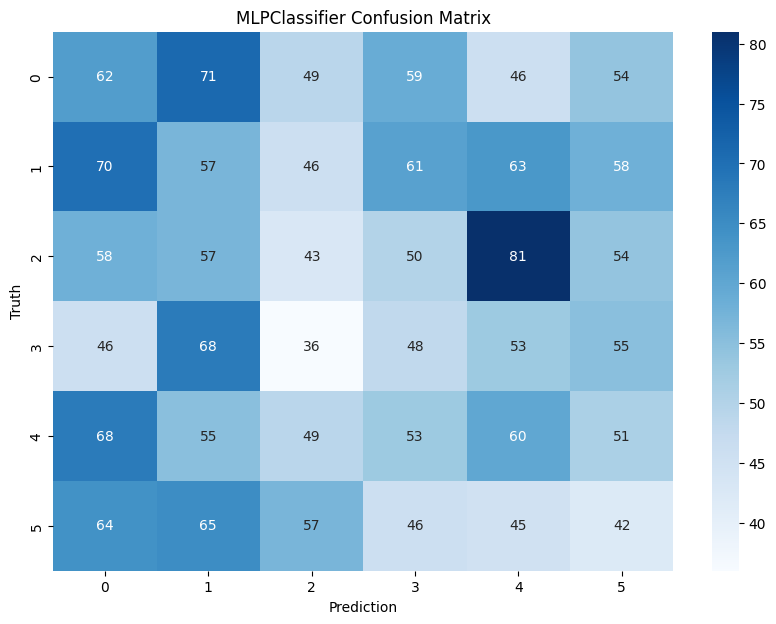

LinearSVC classification report
                  precision    recall  f1-score   support

Ammonium Sulfate       0.17      0.21      0.19       341
         Compost       0.17      0.14      0.15       355
             DAP       0.18      0.24      0.21       343
             MOP       0.14      0.07      0.09       306
             NPK       0.17      0.19      0.18       336
            Urea       0.20      0.18      0.19       319

        accuracy                           0.17      2000
       macro avg       0.17      0.17      0.17      2000
    weighted avg       0.17      0.17      0.17      2000



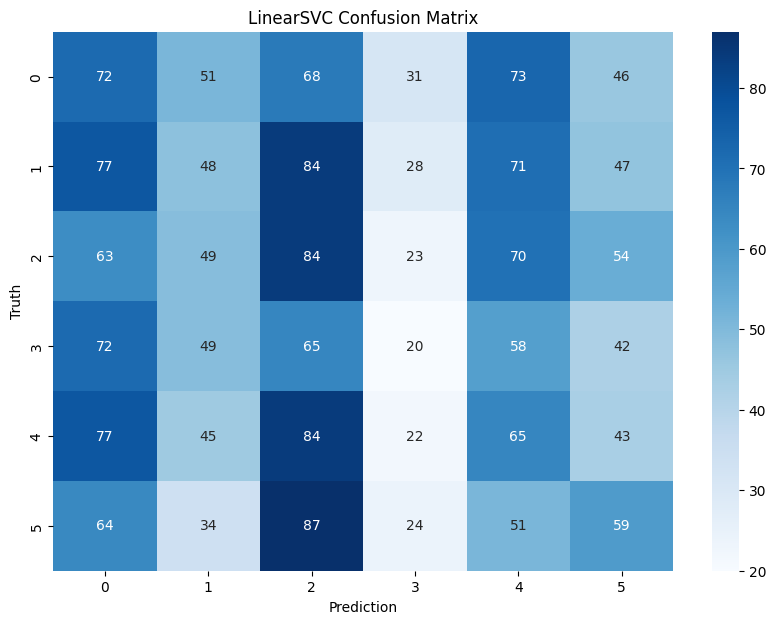

All files saved and zipped in all_models.zip


In [43]:
# Train and evaluate various models
models = {
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "RidgeClassifier": RidgeClassifier(),
    "PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
    "Perceptron": Perceptron(),
    "BaggingClassifier": BaggingClassifier(), # Check if BaggingClassifier is overwritten in your code
    "HistGradientBoostingClassifier": HistGradientBoostingClassifier(),
    "SGDClassifier": SGDClassifier(),
    "NearestCentroid": NearestCentroid(),
    "K-NeighborsClassifier": KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "RandomForestClassifier": RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42),
    "LogisticRegression": LogisticRegression(solver='liblinear',max_iter=1000),
    "SupportVectorClassifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "CatBoostClassifier": CatBoostClassifier(verbose=0),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    "LabelPropagation": LabelPropagation(),
    "LabelSpreading": LabelSpreading(),
    "GaussianProcessClassifier": GaussianProcessClassifier(),
    "GaussianNB": GaussianNB(),
    "VotingClassifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('svc', SVC())
    ], voting='hard'),
    "StackingClassifier": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('svc', SVC())
        ], final_estimator=LogisticRegression()
    ),
    "BaggingClassifier_SVC": BaggingClassifier(estimator=SVC(), n_estimators=10), # Change 'base_estimator' to 'estimator'
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "LinearSVC": LinearSVC(max_iter=10000),

}

# Create directory if it does not exist
if not os.path.exists('all_models'):
    os.makedirs('all_models')

# Evaluate and save all models
accuracies = {}
for model_name, model in models.items():
    acc = evaluate_and_save_model(model, model_name)
    accuracies[model_name] = acc


zip_path = 'all_models.zip'  # Specify the full path including the .zip filename

with zipfile.ZipFile(zip_path, 'w') as zipf:
    for root, dirs, files in os.walk("/kaggle/working/all_models"):
        for file in files:
            # Preserve the directory structure in the zip file
            zipf.write(os.path.join(root, file),
                       arcname=os.path.relpath(os.path.join(root, file),
                                              "/content/all_models"))
print(f"All files saved and zipped in {zip_path}")

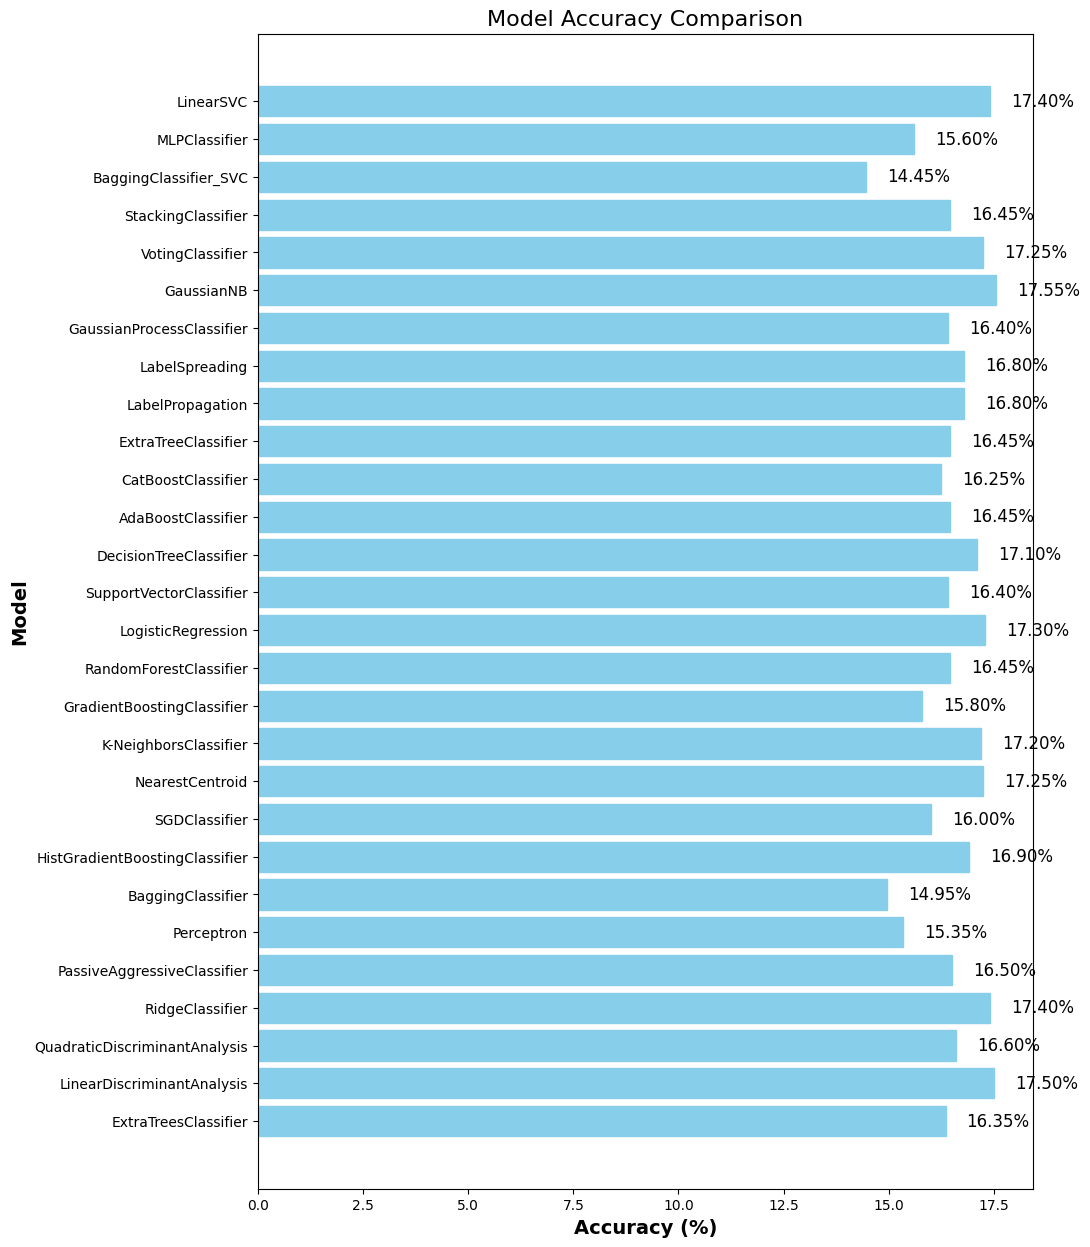

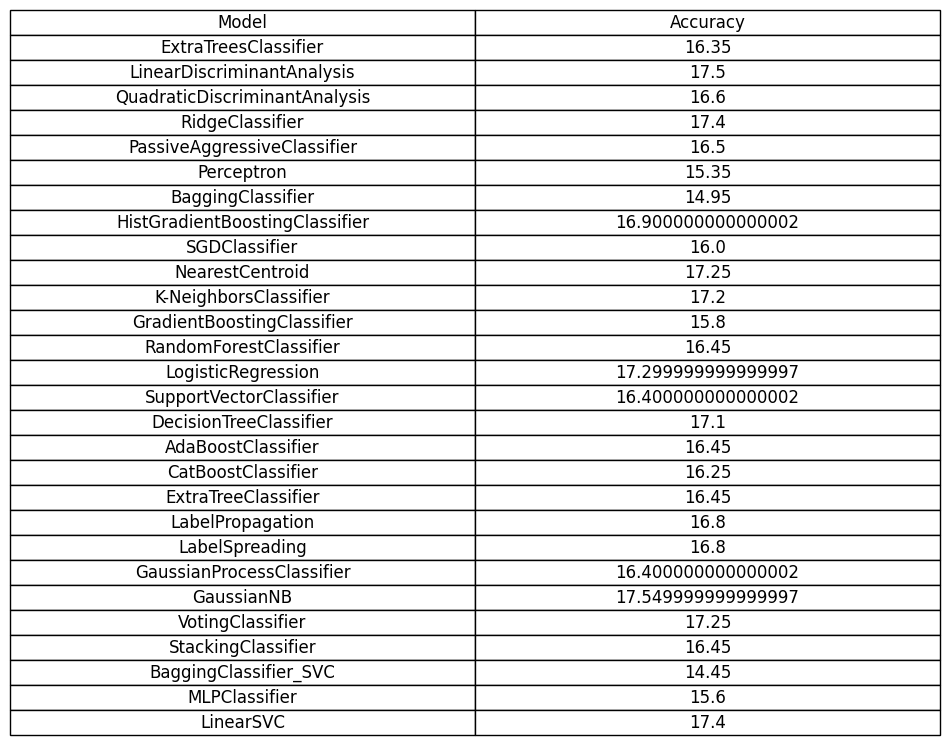

The best model is GaussianNB with an accuracy of 17.55%


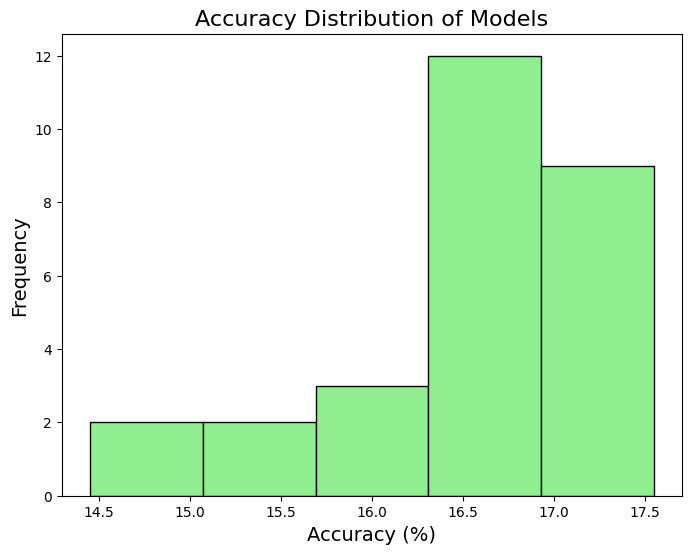

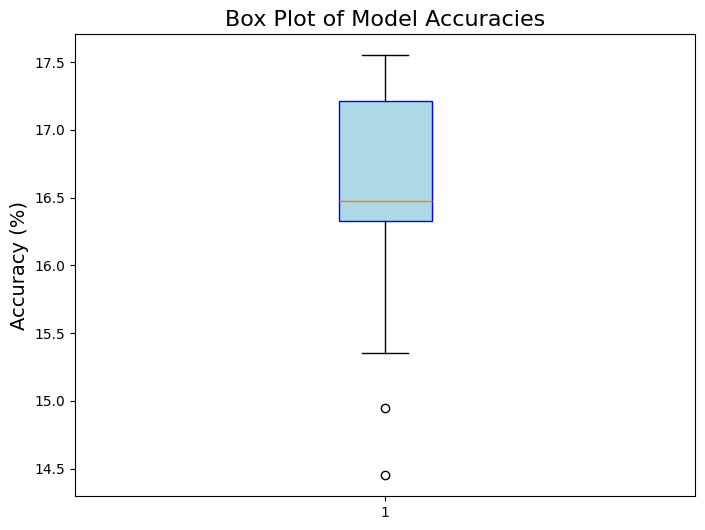

Top 5 models based on accuracy:
                         Model  Accuracy
22                  GaussianNB     17.55
1   LinearDiscriminantAnalysis     17.50
27                   LinearSVC     17.40
3              RidgeClassifier     17.40
13          LogisticRegression     17.30


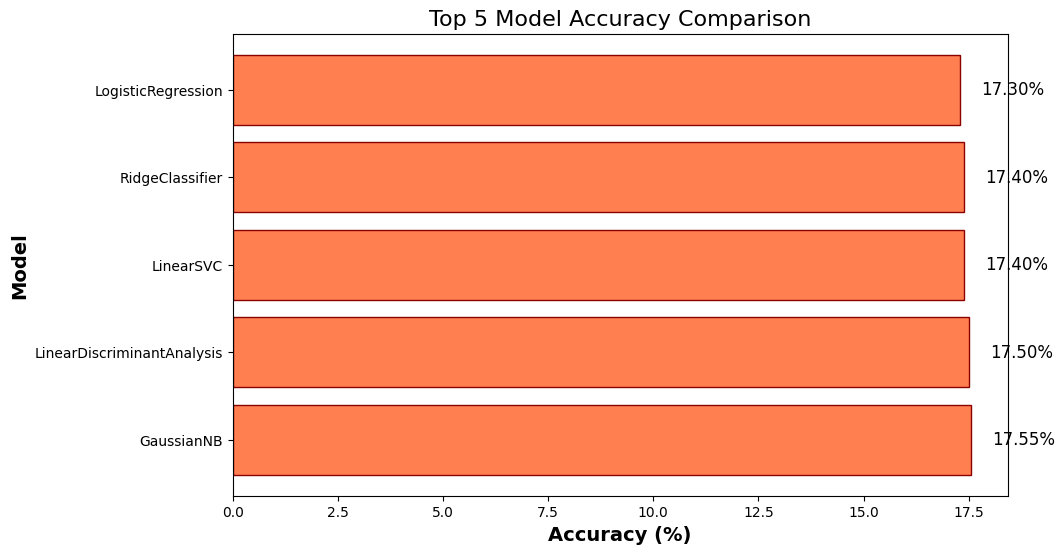

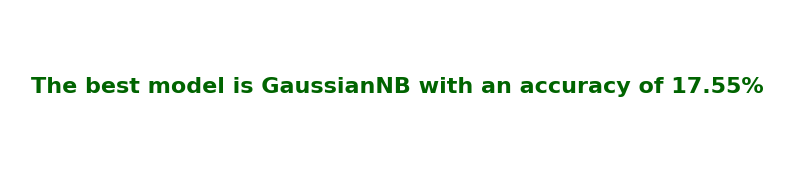

In [44]:
# Create a DataFrame for model comparison
model_comparison_table = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
model_comparison_table['Accuracy'] = model_comparison_table['Accuracy'] * 100  # Convert to percentage

# Save the DataFrame as a CSV file
model_comparison_table.to_csv("Model_Accuracy_Comparison.csv", index=False)

# Plotting the horizontal bar chart with larger height and bold model names
fig, ax = plt.subplots(figsize=(10, 15))
bars = ax.barh(model_comparison_table['Model'], model_comparison_table['Accuracy'], color='skyblue', edgecolor='skyblue')
ax.set_xlabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Model', fontsize=14, fontweight='bold')
ax.set_title('Model Accuracy Comparison', fontsize=16)

# Display accuracies on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f"{width:.2f}%", ha='left', va='center', fontsize=12)

# Save the horizontal bar chart
plt.savefig("Model_Accuracy_Comparison_BarChart.png", bbox_inches='tight')
plt.show()

# Plotting the table separately
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table_data = model_comparison_table.values
table = ax.table(cellText=table_data, colLabels=model_comparison_table.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Save the table plot
plt.savefig("Model_Accuracy_Comparison_Table.png", bbox_inches='tight')
plt.show()

# Determine the best model
best_model_name = model_comparison_table.loc[model_comparison_table['Accuracy'].idxmax(), 'Model']
best_model_accuracy = model_comparison_table['Accuracy'].max()
print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}%")

# Plot accuracy distribution (histogram) to visualize spread
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(model_comparison_table['Accuracy'], bins=5, color='lightgreen', edgecolor='black')
ax.set_title("Accuracy Distribution of Models", fontsize=16)
ax.set_xlabel("Accuracy (%)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)

# Save the histogram plot
plt.savefig("Model_Accuracy_Distribution.png", bbox_inches='tight')
plt.show()

# Box plot for accuracy spread
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(model_comparison_table['Accuracy'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
ax.set_title("Box Plot of Model Accuracies", fontsize=16)
ax.set_ylabel("Accuracy (%)", fontsize=14)

# Save the box plot
plt.savefig("Model_Accuracy_BoxPlot.png", bbox_inches='tight')
plt.show()

# Sort the DataFrame by accuracy in descending order and get the top five models
top_five_models = model_comparison_table.sort_values(by='Accuracy', ascending=False).head(5)
print("Top 5 models based on accuracy:")
print(top_five_models)

# Display top five models in a separate plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_five_models['Model'], top_five_models['Accuracy'], color='coral', edgecolor='darkred')
ax.set_xlabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Model', fontsize=14, fontweight='bold')
ax.set_title('Top 5 Model Accuracy Comparison', fontsize=16)

# Display accuracies on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f"{width:.2f}%", ha='left', va='center', fontsize=12)

# Save the top five models chart
plt.savefig("Top_5_Model_Accuracy_Comparison_BarChart.png", bbox_inches='tight')
plt.show()


# Final Decision Plot
fig, ax = plt.subplots(figsize=(10, 2))
ax.text(0.5, 0.5, f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}%",
        ha='center', va='center', fontsize=16, fontweight='bold', color='darkgreen')
ax.axis('off')

# Save the final decision plot
plt.savefig("Model_Final_Decision.png", bbox_inches='tight')
plt.show()